In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
from datetime import datetime
import random

from sklearn import preprocessing as pp
from sklearn.ensemble import RandomForestClassifier as RFC

##Loading and exploring the ds_test_demog_out table

In [2]:
ds_test_demog_out = pd.read_table("ds_test_demog_out.csv", sep = ',', encoding = 'utf-8')
ds_test_demog_out.shape

(4450, 3)

In [3]:
ds_test_demog_out.head()

,uid,attr1,attr2
0,AAA-1,type_a,null
1,AAA-100,type_b,null
2,AAA-1002,type_a,null
3,AAA-1003,type_b,null
4,AAA-1005,type_b,b


In [4]:
ds_test_demog_out.describe()

,uid,attr1,attr2
count,4450,4450,4450
unique,4450,3,4
top,AAA-6693,type_b,null
freq,1,2927,2895


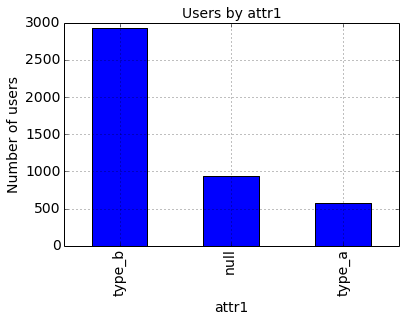

In [5]:
myplot = ds_test_demog_out["attr1"].value_counts().plot(kind='bar', fontsize = 14)
myplot.set_title("Users by attr1", fontsize = 14)
myplot.set_xlabel("attr1", fontsize = 14)
myplot.set_ylabel("Number of users", fontsize = 14)

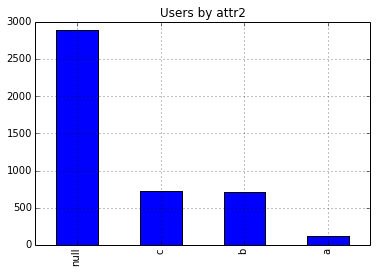

In [6]:
ds_test_demog_out["attr2"].value_counts().plot(kind='bar', title = "Users by attr2")

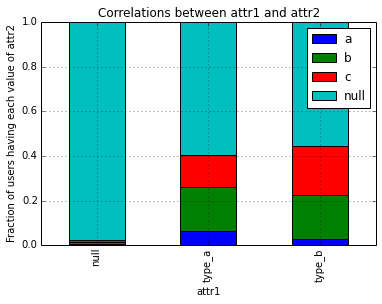

In [7]:
test = ds_test_demog_out.copy()
test = test.groupby(['attr1', 'attr2']).size().reset_index()
test = test.pivot(index='attr1', columns='attr2', values = 0).reset_index()
test['total'] = test['a'] + test['b'] + test['c'] + test['null']
test[['a', 'b', 'c', 'null']] = test[['a', 'b', 'c', 'null']].astype(float)
test['a'] /= test['total']
test['b'] /= test['total']
test['c'] /= test['total']
test['null'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'attr1', title = "Correlations between attr1 and attr2")
myplot.set_xlabel("attr1")
myplot.set_ylabel("Fraction of users having each value of attr2")
myplot.legend(framealpha=1)

In [8]:
ds_test_demog_out_plus_features = ds_test_demog_out.copy()
ds_test_demog_out_plus_features.shape

(4450, 3)

##Loading and exploring the ds_test_log_out table

In [9]:
ds_test_log_out = pd.read_table("ds_test_log_out.csv", sep = ',', encoding = 'utf-8')
ds_test_log_out.shape

(439337, 6)

In [10]:
ds_test_log_out.head()

,uid,DT,dvc_type,geo_code,section_code,views
0,AAA-3045,2014-03-12,desktp,geo_59,section_27,1
1,AAA-1198,2014-03-24,desktp,geo_59,section_27,1
2,AAA-5734,2014-03-26,desktp,geo_59,section_27,1
3,AAA-4008,2014-03-13,desktp,geo_59,section_27,1
4,AAA-4008,2014-03-12,desktp,geo_59,section_27,3


In [11]:
ds_test_log_out.describe()

,views
count,439307.000000
mean,7.909985
std,19.031831
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,1192.000000


In [12]:
len(ds_test_log_out['uid'].unique())

4560

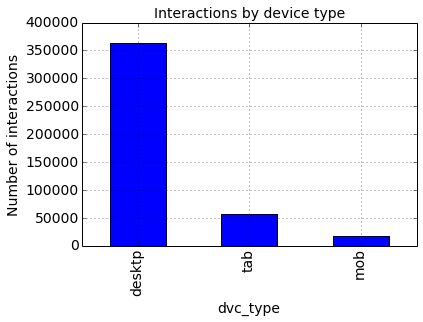

In [13]:
myplot = ds_test_log_out["dvc_type"].value_counts().plot(kind='bar', fontsize = 14)
myplot.set_title("Interactions by device type", fontsize = 14)
myplot.set_xlabel("dvc_type", fontsize = 14)
myplot.set_ylabel("Number of interactions", fontsize = 14)

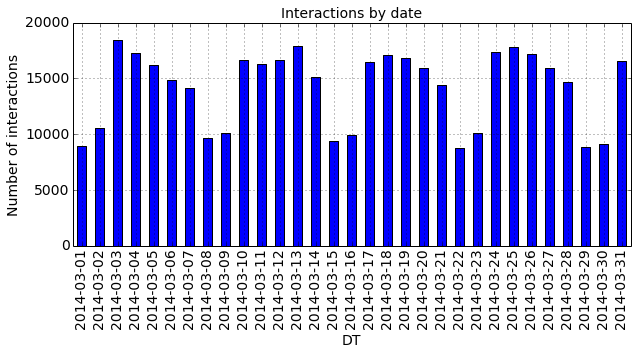

In [14]:
myplot = ds_test_log_out["DT"].value_counts().sort_index().plot(kind='bar', fontsize = 14, figsize = (10, 4))
myplot.set_title("Interactions by date", fontsize = 14)
myplot.set_xlabel("DT", fontsize = 14)
myplot.set_ylabel("Number of interactions", fontsize = 14)

In [15]:
Mondays = ['2014-03-03', '2014-03-10', '2014-03-17', '2014-03-24', '2014-03-31']
Tuesdays = ['2014-03-04', '2014-03-11', '2014-03-18', '2014-03-25']
Wednesdays = ['2014-03-05', '2014-03-12', '2014-03-19', '2014-03-26']
Thursdays = ['2014-03-06', '2014-03-13', '2014-03-20', '2014-03-27']
Fridays = ['2014-03-07', '2014-03-14', '2014-03-21', '2014-03-28']
Saturdays = ['2014-03-01', '2014-03-08', '2014-03-15', '2014-03-22', '2014-03-29'] 
Sundays = ['2014-03-02', '2014-03-09', '2014-03-16', '2014-03-23', '2014-03-30']
weekend_days = Saturdays + Sundays
weekdays = Mondays + Tuesdays + Wednesdays + Thursdays + Fridays



week1 = ['2014-03-01', '2014-03-02', '2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06', '2014-03-07']
week2 = ['2014-03-08', '2014-03-09', '2014-03-10', '2014-03-11', '2014-03-12', '2014-03-13', '2014-03-14']
week3 = ['2014-03-15', '2014-03-16', '2014-03-17', '2014-03-18', '2014-03-19', '2014-03-20', '2014-03-21']
week4 = ['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25', '2014-03-26', '2014-03-27', '2014-03-28']
week5 = ['2014-03-29', '2014-03-30', '2014-03-31']

DT = week1 + week2 + week3 + week4 + week5
weeks = ['week1', 'week1', 'week1', 'week1', 'week1', 'week1', 'week1', 
         'week2', 'week2', 'week2', 'week2', 'week2', 'week2', 'week2',
         'week3', 'week3', 'week3', 'week3', 'week3', 'week3', 'week3',
         'week4', 'week4', 'week4', 'week4', 'week4', 'week4', 'week4',
         'week5', 'week5', 'week5']
daynames = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
            'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
            'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
            'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
            'Saturday', 'Sunday', 'Monday']

weekdf = pd.DataFrame()
weekdf['DT'] = np.array(DT)
weekdf['week'] = np.array(weeks)

daynamedf = pd.DataFrame()
daynamedf['DT'] = np.array(DT)
daynamedf['dayname'] = np.array(daynames)

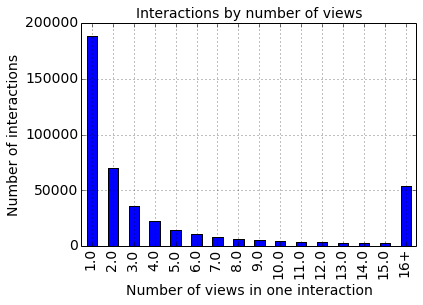

In [16]:
temp = []
for i in ds_test_log_out["views"]:
    if i >= 16:
        temp.append('16+')
    else:
        temp.append(i)
myplot = pd.Series(temp).value_counts().sort_index().plot(kind='bar', fontsize = 14)
myplot.set_title("Interactions by number of views", fontsize = 14)
myplot.set_xlabel("Number of views in one interaction", fontsize = 14)
myplot.set_ylabel("Number of interactions", fontsize = 14)

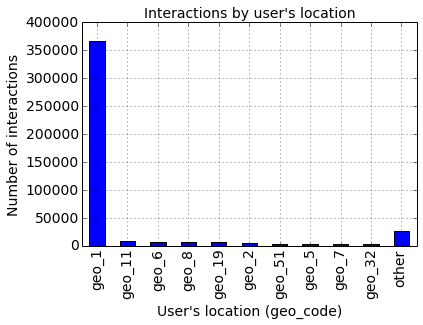

In [17]:
largest = ['geo_1', 'geo_11', 'geo_6', 'geo_8', 'geo_19', 'geo_2', 'geo_51', 'geo_5', 'geo_7', 'geo_32']
temp = []
for i in ds_test_log_out["geo_code"]:
    if i not in largest:
        temp.append('other')
    else:
        temp.append(i)

largest.append('other')        
temp_df = pd.DataFrame(pd.Series(temp).value_counts())
myplot = temp_df.ix[largest].plot(kind='bar', fontsize = 14, legend = False)
myplot.set_title("Interactions by user's location", fontsize = 14)
myplot.set_xlabel("User's location (geo_code)", fontsize = 14)
myplot.set_ylabel("Number of interactions", fontsize = 14)

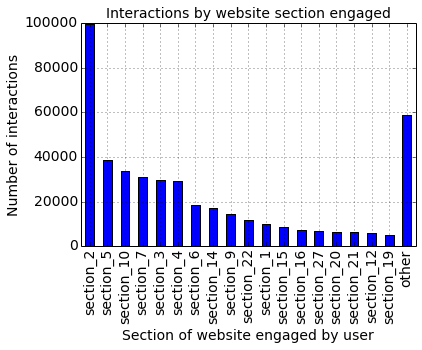

In [18]:
largest = ['section_2', 'section_5', 'section_10', 'section_7', 'section_3', 'section_4', 
'section_6', 'section_14', 'section_9', 'section_22', 'section_1', 'section_15',
'section_16', 'section_27', 'section_20', 'section_21', 'section_12', 'section_19']

temp = []
for i in ds_test_log_out["section_code"]:
    if i not in largest:
        temp.append('other')
    else:
        temp.append(i)

largest.append('other')        
temp_df = pd.DataFrame(pd.Series(temp).value_counts())
myplot = temp_df.ix[largest].plot(kind='bar', legend = False, fontsize = 14)
myplot.set_title("Interactions by website section engaged", fontsize = 14)
myplot.set_xlabel("Section of website engaged by user", fontsize = 14)
myplot.set_ylabel("Number of interactions", fontsize = 14)

##Merging the two tables and further exploring

In [19]:
mymerged = pd.merge(ds_test_log_out, ds_test_demog_out, how = "inner", on = "uid", sort = True)
mymerged.head()
mymerged.shape

(427671, 8)

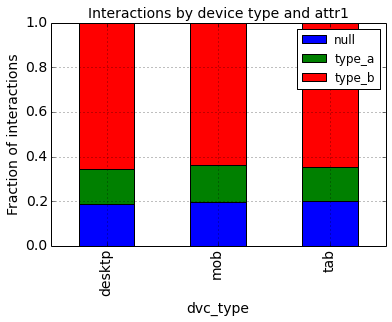

In [20]:
test = mymerged.copy()
test = test.groupby(['dvc_type', 'attr1']).size().reset_index()
test = test.pivot(index='dvc_type', columns='attr1', values = 0).reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
test.head()
myplot = test.plot(kind='bar', stacked = True, x = 'dvc_type', fontsize = 14)
myplot.set_title("Interactions by device type and attr1", fontsize = 14)
myplot.set_xlabel("dvc_type", fontsize = 14)
myplot.set_ylabel("Fraction of interactions", fontsize = 14)
myplot.legend(framealpha=1)

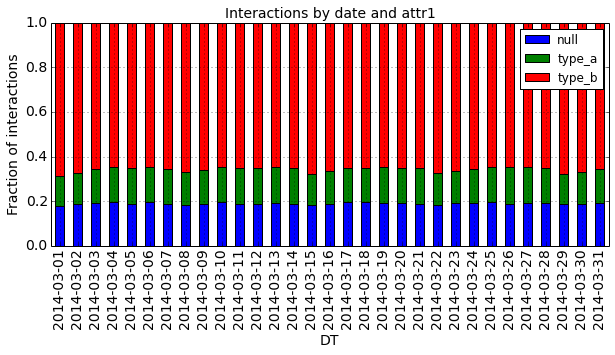

In [21]:
test = mymerged.copy()
test = test.groupby(['DT', 'attr1']).size().reset_index()
test = test.pivot(index='DT', columns='attr1', values = 0).reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
test.head()
myplot = test.plot(kind='bar', stacked = True, x = 'DT', fontsize = 14, figsize = (10, 4))
myplot.set_title("Interactions by date and attr1", fontsize = 14)
myplot.set_xlabel("DT", fontsize = 14)
myplot.set_ylabel("Fraction of interactions", fontsize = 14)
myplot.legend(framealpha=1)

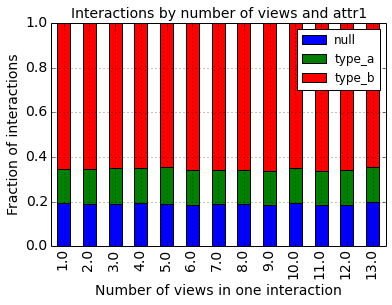

In [22]:
test = mymerged.copy()
test  = test.groupby(['views', 'attr1']).size().reset_index()
test = test.pivot(index='views', columns='attr1', values = 0).reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test = test[test.total > 3000].sort('total', ascending = False)
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
test.head()
myplot = test.plot(kind='bar', stacked = True, x = 'views', fontsize = 14)
myplot.set_title("Interactions by number of views and attr1", fontsize = 14)
myplot.set_xlabel("Number of views in one interaction", fontsize = 14)
myplot.set_ylabel("Fraction of interactions", fontsize = 14)
myplot.legend(framealpha=1)

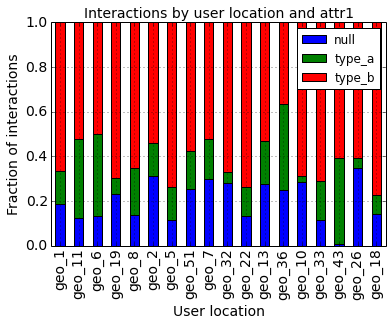

In [23]:
test = mymerged.copy()
test = test.groupby(['geo_code', 'attr1']).size().reset_index()
test = test.pivot(index='geo_code', columns='attr1', values = 0).reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test = test[test.total > 1000].sort('total', ascending = False)
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
test.head()
myplot = test.plot(kind='bar', stacked = True, x = 'geo_code', fontsize = 14)
myplot.set_title("Interactions by user location and attr1", fontsize = 14)
myplot.set_xlabel("User location", fontsize = 14)
myplot.set_ylabel("Fraction of interactions", fontsize = 14)
myplot.legend(framealpha=1)

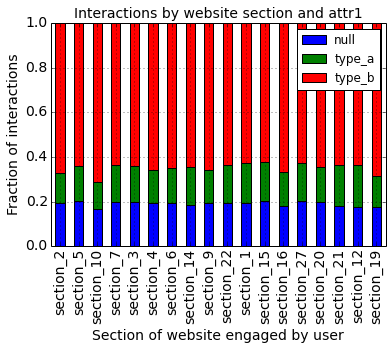

In [24]:
test = mymerged.copy()
test = test.groupby(['section_code', 'attr1']).size().reset_index()
test = test.pivot(index='section_code', columns='attr1', values = 0).reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test = test[test.total > 5000].sort('total', ascending = False)
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
#test.head()
myplot = test.plot(kind='bar', stacked = True, x = 'section_code', fontsize = 14)
myplot.set_title("Interactions by website section and attr1", fontsize = 14)
myplot.set_xlabel("Section of website engaged by user", fontsize = 14)
myplot.set_ylabel("Fraction of interactions", fontsize = 14)
myplot.legend(framealpha=1)

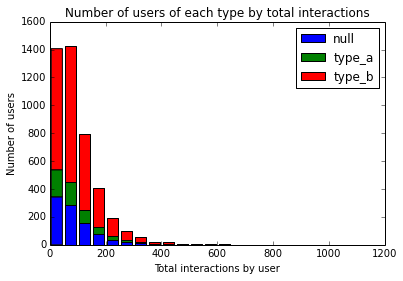

In [25]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1']).size().reset_index()

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])
ds_test_demog_out_plus_features = ds_test_demog_out_plus_features.rename(columns = {0:'total_interactions'})

test.sort(0, ascending = False, inplace = True)
plt.hist([test[test.attr1 == 'null'][0], test[test.attr1 == 'type_a'][0], test[test.attr1 == 'type_b'][0]], bins = 22, range = (0, 1100), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Number of users of each type by total interactions")
plt.xlabel("Total interactions by user")
plt.ylabel("Number of users")
plt.legend()

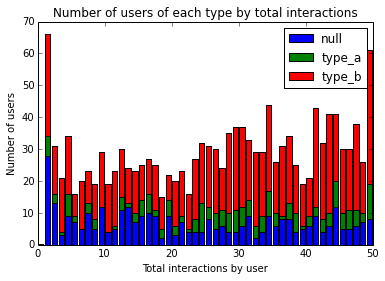

In [26]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1']).size().reset_index()
test.sort(0, ascending = False, inplace = True)
plt.hist([test[test.attr1 == 'null'][0], test[test.attr1 == 'type_a'][0], test[test.attr1 == 'type_b'][0]], bins = 50, range = (0, 50), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Number of users of each type by total interactions")
plt.xlabel("Total interactions by user")
plt.ylabel("Number of users")
plt.legend()

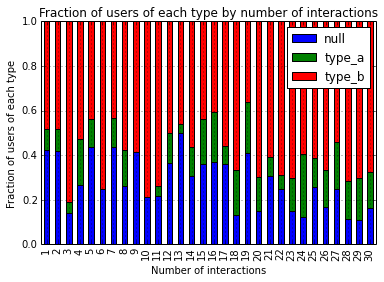

In [27]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1']).size().reset_index()
test.columns = ['uid', 'attr1', 'num_interactions']
test = test.groupby(['num_interactions', 'attr1']).size().reset_index()
test = test.pivot(index='num_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test = test[test.num_interactions <= 30]
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'num_interactions', title = "Fraction of users of each type by number of interactions")
myplot.set_xlabel("Number of interactions")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

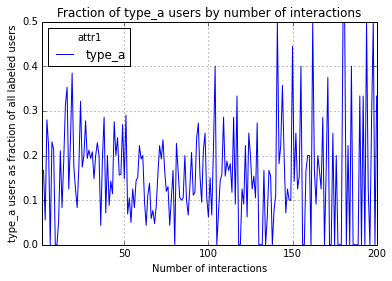

In [28]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1']).size().reset_index()
test.columns = ['uid', 'attr1', 'num_interactions']
test = test.groupby(['num_interactions', 'attr1']).size().reset_index()
test = test.pivot(index='num_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.num_interactions <= 200]
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['type_a'] /= (test['type_a'] + test['type_b'])
test.drop(['null', 'type_b'], axis = 1, inplace = True)
myplot = test.plot(kind='line', x = 'num_interactions', title = "Fraction of type_a users by number of interactions")
myplot.set_xlabel("Number of interactions")
myplot.set_ylabel("type_a users as fraction of all labeled users")

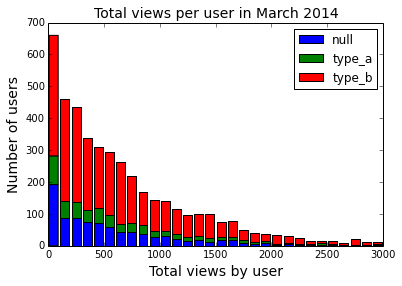

In [29]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'views']).size().reset_index()
test.columns = ['uid', 'attr1', 'views', 'num_interactions']
test['total_views'] = test['views'] * test['num_interactions'] 
test.drop(['views', 'num_interactions'], axis = 1, inplace = True)
test = test.groupby(['uid', 'attr1']).sum().reset_index().sort('total_views', ascending = False)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])
ds_test_demog_out_plus_features = ds_test_demog_out_plus_features.rename(columns = {"total_views": "total_views_all_interactions"})

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 30, range = (0, 3000), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Total views per user in March 2014", fontsize = 14)
plt.xlabel("Total views by user", fontsize = 14)
plt.ylabel("Number of users", fontsize = 14)
plt.legend()

##Number of views per interaction

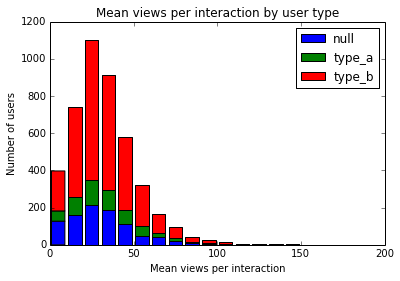

In [30]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'views']).size().reset_index()
test.columns = ['uid', 'attr1', 'views', 'num_interactions']
test['total_views'] = test['views'] * test['num_interactions'] 
test.drop(['views', 'num_interactions'], axis = 1, inplace = True)
test = test.groupby(['uid', 'attr1']).mean().reset_index().sort('total_views', ascending = False)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])
ds_test_demog_out_plus_features = ds_test_demog_out_plus_features.rename(columns = {"total_views": "mean_views_per_interaction"})

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 20, range = (0, 200), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Mean views per interaction by user type")
plt.xlabel("Mean views per interaction")
plt.ylabel("Number of users")
plt.legend()

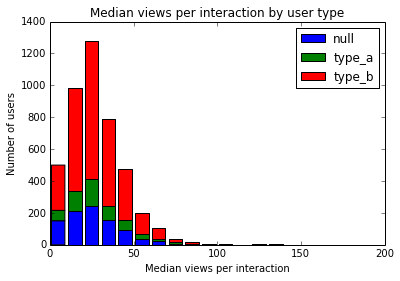

In [31]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'views']).size().reset_index()
test.columns = ['uid', 'attr1', 'views', 'num_interactions']
test['total_views'] = test['views'] * test['num_interactions'] 
test.drop(['views', 'num_interactions'], axis = 1, inplace = True)
test = test.groupby(['uid', 'attr1']).median().reset_index().sort('total_views', ascending = False)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])
ds_test_demog_out_plus_features = ds_test_demog_out_plus_features.rename(columns = {"total_views": "median_views_per_interaction"})

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 20, range = (0, 200), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Median views per interaction by user type")
plt.xlabel("Median views per interaction")
plt.ylabel("Number of users")
plt.legend()

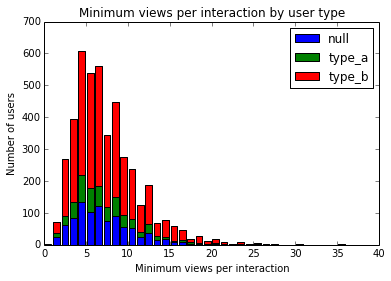

In [32]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'views']).size().reset_index()
test.columns = ['uid', 'attr1', 'views', 'num_interactions']
test['total_views'] = test['views'] * test['num_interactions'] 
test.drop(['views', 'num_interactions'], axis = 1, inplace = True)
test = test.groupby(['uid', 'attr1']).min().reset_index().sort('total_views', ascending = False)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])
ds_test_demog_out_plus_features = ds_test_demog_out_plus_features.rename(columns = {"total_views": "min_views_per_interaction"})

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 40, range = (0, 40), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Minimum views per interaction by user type")
plt.xlabel("Minimum views per interaction")
plt.ylabel("Number of users")
plt.legend()

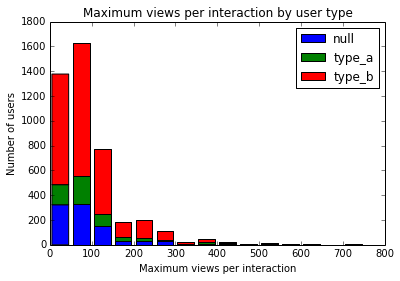

In [33]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'views']).size().reset_index()
test.columns = ['uid', 'attr1', 'views', 'num_interactions']
test['total_views'] = test['views'] * test['num_interactions'] 
test.drop(['views', 'num_interactions'], axis = 1, inplace = True)
test = test.groupby(['uid', 'attr1']).max().reset_index().sort('total_views', ascending = False)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])
ds_test_demog_out_plus_features = ds_test_demog_out_plus_features.rename(columns = {"total_views": "max_views_per_interaction"})

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 16, range = (0, 800), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Maximum views per interaction by user type")
plt.xlabel("Maximum views per interaction")
plt.ylabel("Number of users")
plt.legend()

##Try engineering features

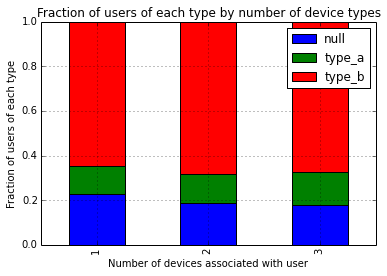

In [34]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'dvc_type']).size().reset_index()
test = test.groupby(['uid', 'attr1']).size().reset_index()
test.columns = ['uid', 'attr1', 'num_device_types']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'num_device_types']).size().reset_index()
test.columns = ['attr1', 'num_device_types', 'count']
test = test.pivot(index='num_device_types', columns='attr1', values = 'count').reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'num_device_types', title = "Fraction of users of each type by number of device types")
myplot.set_xlabel("Number of devices associated with user")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

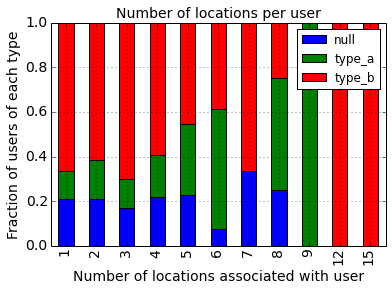

In [35]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'geo_code']).size().reset_index()
test = test.groupby(['uid', 'attr1']).size().reset_index()
test.columns = ['uid', 'attr1', 'num_geo_codes']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'num_geo_codes']).size().reset_index()
test.columns = ['attr1', 'num_geo_codes', 'count']
test = test.pivot(index='num_geo_codes', columns='attr1', values = 'count').reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'num_geo_codes', fontsize = 14)
myplot.set_title("Number of locations per user", fontsize = 14)
myplot.set_xlabel("Number of locations associated with user", fontsize = 14)
myplot.set_ylabel("Fraction of users of each type", fontsize = 14)
myplot.legend(framealpha=1)

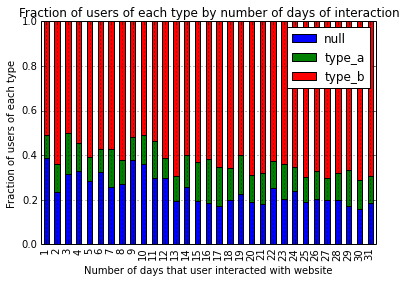

In [36]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).size().reset_index()
test.columns = ['uid', 'attr1', 'num_days']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'num_days']).size().reset_index()
test.columns = ['attr1', 'num_days', 'count']
test = test.pivot(index='num_days', columns='attr1', values = 'count').reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'num_days', title = "Fraction of users of each type by number of days of interaction")
myplot.set_xlabel("Number of days that user interacted with website")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

(-0.29748915846877932, 0.10409391586922291)


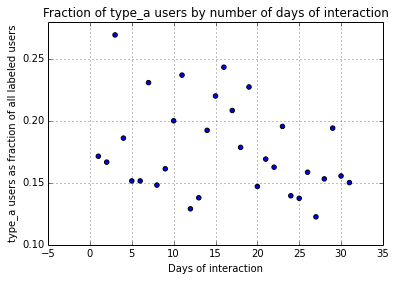

In [37]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).size().reset_index()
test.columns = ['uid', 'attr1', 'num_days']
test = test.groupby(['attr1', 'num_days']).size().reset_index()
test.columns = ['attr1', 'num_days', 'count']
test = test.pivot(index='num_days', columns='attr1', values = 'count').reset_index()
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['type_a'] /= (test['type_a'] + test['type_b'])
test.drop(['null', 'type_b'], axis = 1, inplace = True)
#myplot = test.plot(kind='line', x = 'num_days', title = "Fraction of type_a users by number of days of interaction")
myplot = test.plot(kind='scatter', x = 'num_days', y = 'type_a', title = "Fraction of type_a users by number of days of interaction")
myplot.set_xlabel("Days of interaction")
myplot.set_ylabel("type_a users as fraction of all labeled users")

myx = test.num_days
myy = test.type_a
#type(myx)
#slope, intercept, r_value, p_value, std_err = sp.stats.linregress(myx, myy)
#print r_value

print stats.pearsonr(myx, myy)

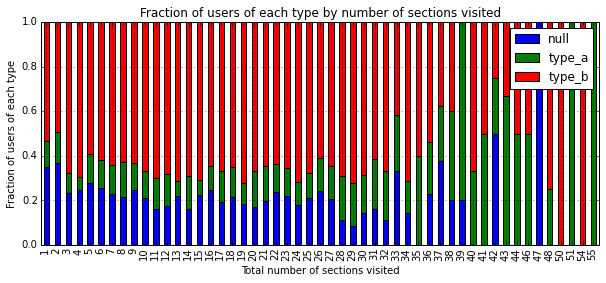

In [38]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1']).size().reset_index()
test.columns = ['uid', 'attr1', 'total_sections_visited']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'total_sections_visited']).size().reset_index()
test.columns = ['attr1', 'total_sections_visited', 'count']
test = test.pivot(index='total_sections_visited', columns='attr1', values = 'count').reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'total_sections_visited', title = "Fraction of users of each type by number of sections visited")
myplot.set_xlabel("Total number of sections visited")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

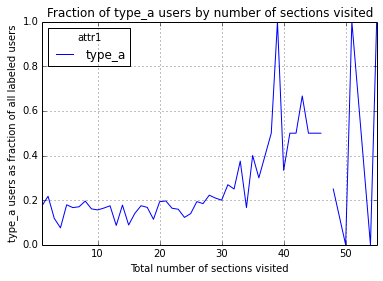

In [39]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1']).size().reset_index()
test.columns = ['uid', 'attr1', 'total_sections_visited']
test = test.groupby(['attr1', 'total_sections_visited']).size().reset_index()
test.columns = ['attr1', 'total_sections_visited', 'count']
test = test.pivot(index='total_sections_visited', columns='attr1', values = 'count').reset_index().fillna(0)
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['type_a'] /= (test['type_a'] + test['type_b'])
test.drop(['null', 'type_b'], axis = 1, inplace = True)
myplot = test.plot(kind='line', x = 'total_sections_visited', title = "Fraction of type_a users by number of sections visited")
myplot.set_xlabel("Total number of sections visited")
myplot.set_ylabel("type_a users as fraction of all labeled users")

##Number of daily interactions

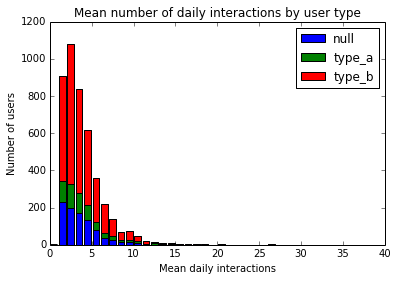

In [40]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).mean().reset_index()
test.columns = ['uid', 'attr1', 'mean_daily_interactions']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 40, range = (0, 40), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Mean number of daily interactions by user type")
plt.xlabel("Mean daily interactions")
plt.ylabel("Number of users")
plt.legend()

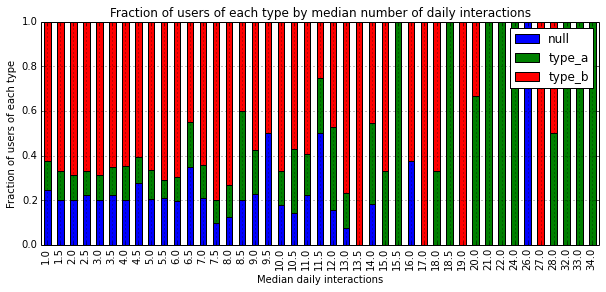

In [41]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).median().reset_index()
test.columns = ['uid', 'attr1', 'med_daily_interactions']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'med_daily_interactions']).size().reset_index()
test = test.pivot(index='med_daily_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'med_daily_interactions', title = "Fraction of users of each type by median number of daily interactions")
myplot.set_xlabel("Median daily interactions")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

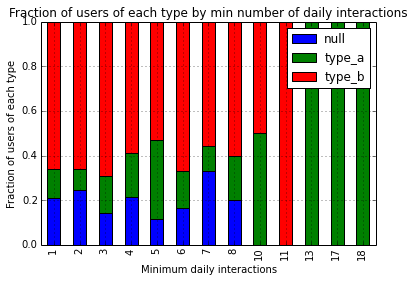

In [42]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).min().reset_index()
test.columns = ['uid', 'attr1', 'DT', 'min_daily_interactions']
test.drop(['DT'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'min_daily_interactions']).size().reset_index()
test = test.pivot(index='min_daily_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'min_daily_interactions', title = "Fraction of users of each type by min number of daily interactions")
myplot.set_xlabel("Minimum daily interactions")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

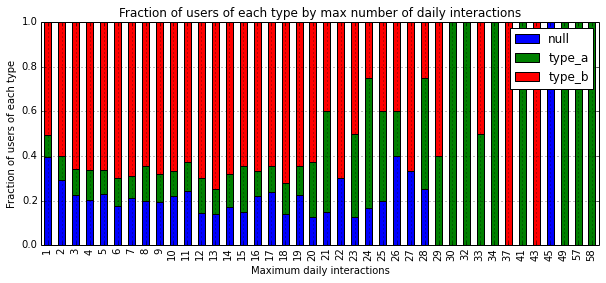

In [43]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).max().reset_index()
test.columns = ['uid', 'attr1', 'DT', 'max_daily_interactions']
test.drop(['DT'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'max_daily_interactions']).size().reset_index()
test = test.pivot(index='max_daily_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'max_daily_interactions', title = "Fraction of users of each type by max number of daily interactions")
myplot.set_xlabel("Maximum daily interactions")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

##Number of weekly interactions

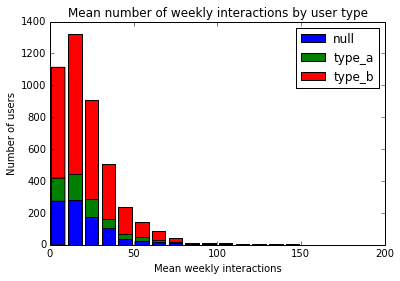

In [44]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']
test = test.groupby(['uid', 'attr1', 'week']).size().reset_index()
test = test.groupby(['uid', 'attr1']).mean().reset_index()
test.columns = ['uid', 'attr1', 'mean_weekly_interactions']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 20, range = (0, 200), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Mean number of weekly interactions by user type")
plt.xlabel("Mean weekly interactions")
plt.ylabel("Number of users")
plt.legend()

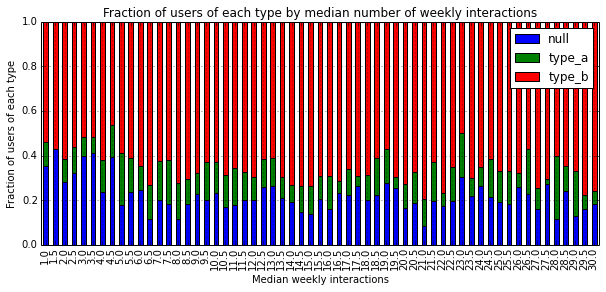

In [45]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']
test = test.groupby(['uid', 'attr1', 'week']).size().reset_index()
test = test.groupby(['uid', 'attr1']).median().reset_index()
test.columns = ['uid', 'attr1', 'med_weekly_interactions']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'med_weekly_interactions']).size().reset_index()
test = test.pivot(index='med_weekly_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.med_weekly_interactions <= 30]
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'med_weekly_interactions', title = "Fraction of users of each type by median number of weekly interactions")
myplot.set_xlabel("Median weekly interactions")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

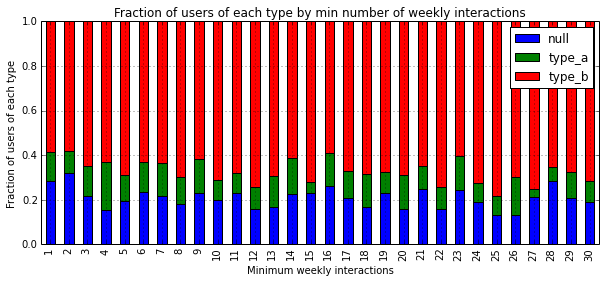

In [46]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']
test = test.groupby(['uid', 'attr1', 'week']).size().reset_index()
test = test.groupby(['uid', 'attr1']).min().reset_index()
test.columns = ['uid', 'attr1', 'DT', 'min_weekly_interactions']
test.drop(['DT'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'min_weekly_interactions']).size().reset_index()
test = test.pivot(index='min_weekly_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.min_weekly_interactions <= 30]
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'min_weekly_interactions', title = "Fraction of users of each type by min number of weekly interactions")
myplot.set_xlabel("Minimum weekly interactions")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

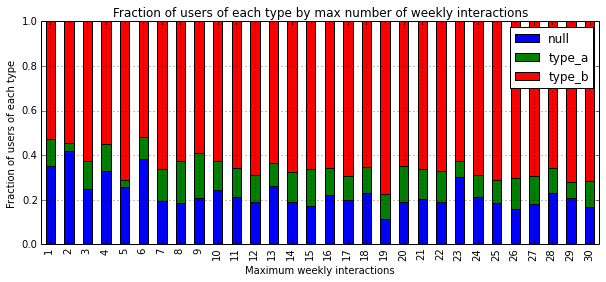

In [47]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']
test = test.groupby(['uid', 'attr1', 'week']).size().reset_index()
test = test.groupby(['uid', 'attr1']).max().reset_index()
test.columns = ['uid', 'attr1', 'DT', 'max_weekly_interactions']
test.drop(['DT'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'max_weekly_interactions']).size().reset_index()
test = test.pivot(index='max_weekly_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.max_weekly_interactions <= 30]
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'max_weekly_interactions', title = "Fraction of users of each type by max number of weekly interactions")
myplot.set_xlabel("Maximum weekly interactions")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

##Number of daily views

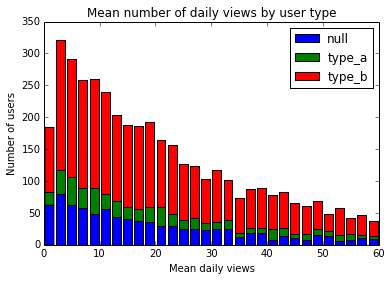

In [48]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT', 'views']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'DT']).sum().reset_index()
test = test.groupby(['uid', 'attr1']).mean().reset_index()
test.columns = ['uid', 'attr1', 'mean_daily_views', 'other']
test.drop(['other'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 30, range = (0, 60), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Mean number of daily views by user type")
plt.xlabel("Mean daily views")
plt.ylabel("Number of users")
plt.legend()

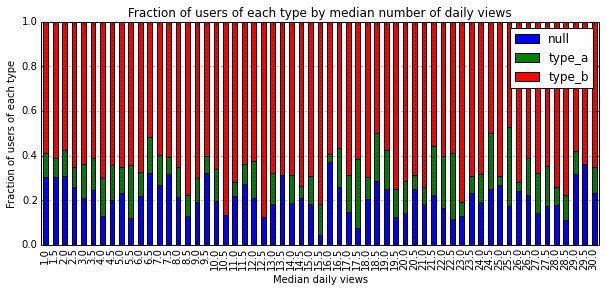

In [49]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT', 'views']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'DT']).sum().reset_index()
test = test.groupby(['uid', 'attr1']).median().reset_index()
test.columns = ['uid', 'attr1', 'median_daily_views', 'other']
test.drop(['other'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'median_daily_views']).size().reset_index()
test = test.pivot(index='median_daily_views', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.median_daily_views <= 30]
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'median_daily_views', title = "Fraction of users of each type by median number of daily views")
myplot.set_xlabel("Median daily views")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

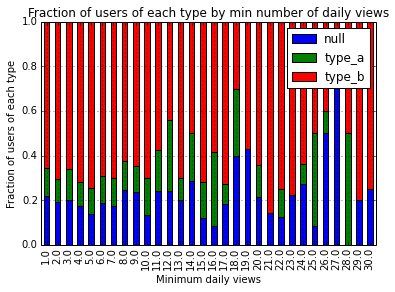

In [50]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT', 'views']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'DT']).sum().reset_index()
test = test.groupby(['uid', 'attr1']).min().reset_index()
test.columns = ['uid', 'attr1', 'lowest_DT', 'min_daily_views', 'other']
test.drop(['lowest_DT', 'other'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'min_daily_views']).size().reset_index()
test = test.pivot(index='min_daily_views', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.min_daily_views <= 30]
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'min_daily_views', title = "Fraction of users of each type by min number of daily views")
myplot.set_xlabel("Minimum daily views")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

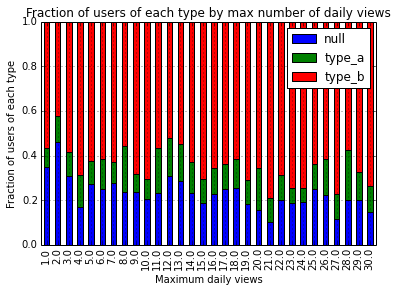

In [51]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT', 'views']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'DT']).sum().reset_index()
test = test.groupby(['uid', 'attr1']).max().reset_index()
test.columns = ['uid', 'attr1', 'highest_DT', 'max_daily_views', 'other']
test.drop(['highest_DT', 'other'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'max_daily_views']).size().reset_index()
test = test.pivot(index='max_daily_views', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.max_daily_views <= 30]
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'max_daily_views', title = "Fraction of users of each type by max number of daily views")
myplot.set_xlabel("Maximum daily views")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

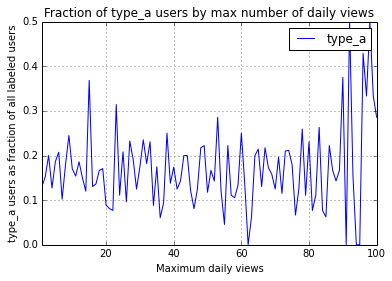

In [52]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT', 'views']).size().reset_index()
test = test.groupby(['uid', 'attr1']).max().reset_index()
test = test.groupby(['attr1', 'views']).size().reset_index()
test = test.pivot(index='views', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.views <= 100]
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['type_a'] /= (test['type_a'] + test['type_b'])
test.drop(['null', 'type_b'], axis = 1, inplace = True)
myplot = test.plot(kind='line', x = 'views', title = "Fraction of type_a users by max number of daily views")
myplot.set_xlabel("Maximum daily views")
myplot.set_ylabel("type_a users as fraction of all labeled users")
myplot.legend(framealpha=1)

##Number of weekly views

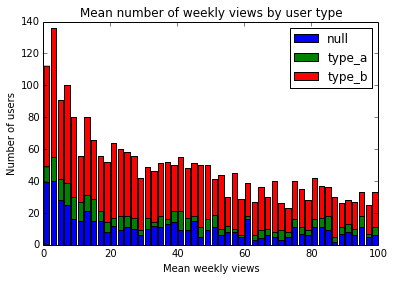

In [53]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']

test = test.groupby(['uid', 'attr1', 'week', 'views']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'week']).sum().reset_index()
test = test.groupby(['uid', 'attr1']).mean().reset_index()
test.columns = ['uid', 'attr1', 'mean_weekly_views', 'other']
test.drop(['other'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 50, range = (0, 100), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Mean number of weekly views by user type")
plt.xlabel("Mean weekly views")
plt.ylabel("Number of users")
plt.legend()

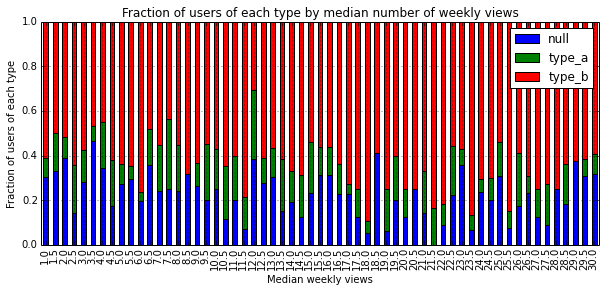

In [54]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']

test = test.groupby(['uid', 'attr1', 'week', 'views']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'week']).sum().reset_index()
test = test.groupby(['uid', 'attr1']).median().reset_index()
test.columns = ['uid', 'attr1', 'median_weekly_views', 'other']
test.drop(['other'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'median_weekly_views']).size().reset_index()
test = test.pivot(index='median_weekly_views', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.median_weekly_views <= 30]
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'median_weekly_views', title = "Fraction of users of each type by median number of weekly views")
myplot.set_xlabel("Median weekly views")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

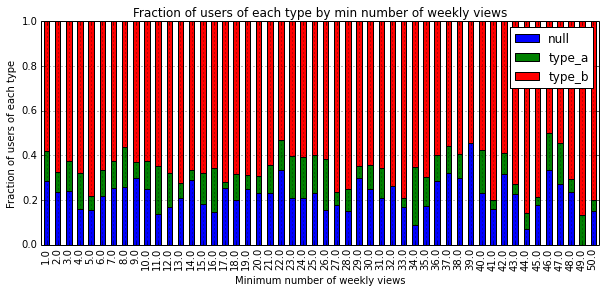

In [55]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']
test = test.groupby(['uid', 'attr1', 'week', 'views']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'week']).sum().reset_index()
test = test.groupby(['uid', 'attr1']).min().reset_index()
test.columns = ['uid', 'attr1', 'lowest_week', 'min_weekly_views', 'other']
test.drop(['lowest_week', 'other'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'min_weekly_views']).size().reset_index()
test = test.pivot(index='min_weekly_views', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.min_weekly_views <= 50]
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'min_weekly_views', title = "Fraction of users of each type by min number of weekly views")
myplot.set_xlabel("Minimum number of weekly views")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

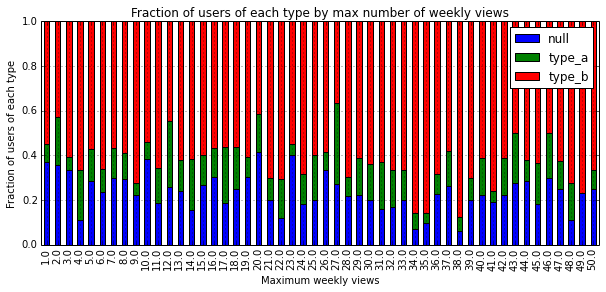

In [56]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']

test = test.groupby(['uid', 'attr1', 'week', 'views']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'week']).sum().reset_index()
test = test.groupby(['uid', 'attr1']).max().reset_index()
test.columns = ['uid', 'attr1', 'highest_week', 'max_weekly_views', 'other']
test.drop(['highest_week', 'other'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'max_weekly_views']).size().reset_index()
test = test.pivot(index='max_weekly_views', columns='attr1', values = 0).reset_index().fillna(0)
test = test[test.max_weekly_views <= 50]
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'max_weekly_views', title = "Fraction of users of each type by max number of weekly views")
myplot.set_xlabel("Maximum weekly views")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

##Number of sections viewed in one day

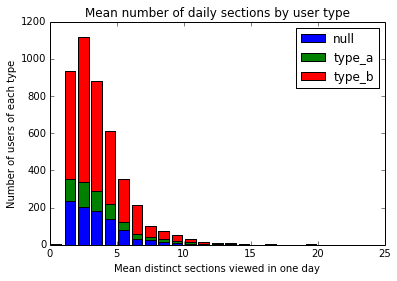

In [57]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).mean().reset_index()
test.columns = ['uid', 'attr1', 'mean_daily_sections']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 25, range = (0, 25), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Mean number of daily sections by user type")
plt.xlabel("Mean distinct sections viewed in one day")
plt.ylabel("Number of users of each type")
plt.legend()

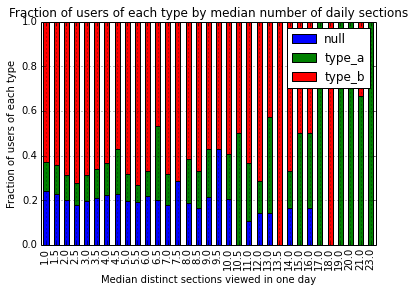

In [58]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).median().reset_index()
test.columns = ['uid', 'attr1', 'median_daily_sections']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['median_daily_sections', 'attr1']).size().reset_index()
test = test.pivot(index = 'median_daily_sections', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'median_daily_sections', title = "Fraction of users of each type by median number of daily sections")
myplot.set_xlabel("Median distinct sections viewed in one day")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

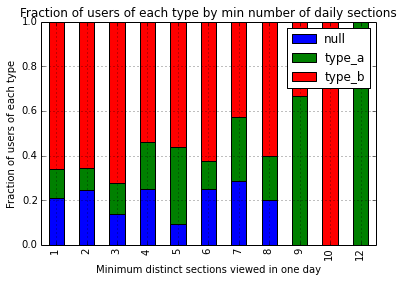

In [59]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).min().reset_index()
test.columns = ['uid', 'attr1', 'min_day', 'min_daily_sections']
test.drop(['min_day'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['min_daily_sections', 'attr1']).size().reset_index()
test = test.pivot(index = 'min_daily_sections', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'min_daily_sections', title = "Fraction of users of each type by min number of daily sections")
myplot.set_xlabel("Minimum distinct sections viewed in one day")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)


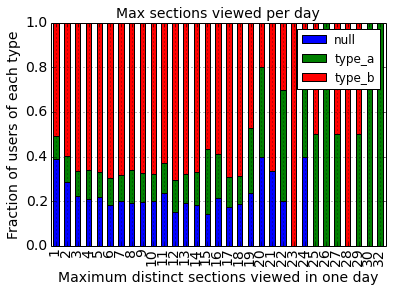

In [60]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).max().reset_index()
test.columns = ['uid', 'attr1', 'day_of_max_sections', 'max_daily_sections']
test.drop(['day_of_max_sections'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['max_daily_sections', 'attr1']).size().reset_index()
test = test.pivot(index = 'max_daily_sections', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'max_daily_sections', fontsize = 14)
myplot.set_title("Max sections viewed per day", fontsize = 14)
myplot.set_xlabel("Maximum distinct sections viewed in one day", fontsize = 14)
myplot.set_ylabel("Fraction of users of each type", fontsize = 14)
myplot.legend(framealpha=1)

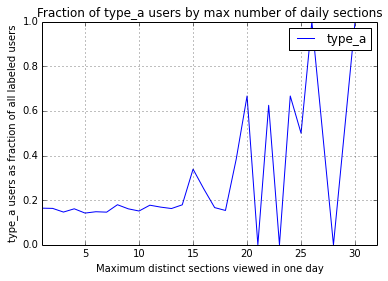

In [61]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test = test.groupby(['uid', 'attr1']).max().reset_index()
test.columns = ['uid', 'attr1', 'day_of_max_sections', 'max_daily_sections']
test = test.groupby(['max_daily_sections', 'attr1']).size().reset_index()
test = test.pivot(index = 'max_daily_sections', columns='attr1', values = 0).reset_index().fillna(0)
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['type_a'] /= (test['type_a'] + test['type_b'])
test.drop(['type_b', 'null'], axis = 1, inplace = True)
myplot = test.plot(kind='line', x = 'max_daily_sections', title = "Fraction of type_a users by max number of daily sections")
myplot.set_xlabel("Maximum distinct sections viewed in one day")
myplot.set_ylabel("type_a users as fraction of all labeled users")
myplot.legend(framealpha=1)


##Number of sections viewed in one week

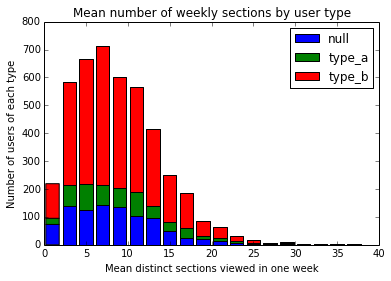

In [62]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']
test = test.groupby(['uid', 'attr1', 'week', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'week']).size().reset_index()
test = test.groupby(['uid', 'attr1']).mean().reset_index()
test.columns = ['uid', 'attr1', 'mean_weekly_sections']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

plt.hist([test[test.attr1 == 'null'], test[test.attr1 == 'type_a'], test[test.attr1 == 'type_b']], bins = 25, range = (0, 50), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Mean number of weekly sections by user type")
plt.xlabel("Mean distinct sections viewed in one week")
plt.ylabel("Number of users of each type")
plt.legend()

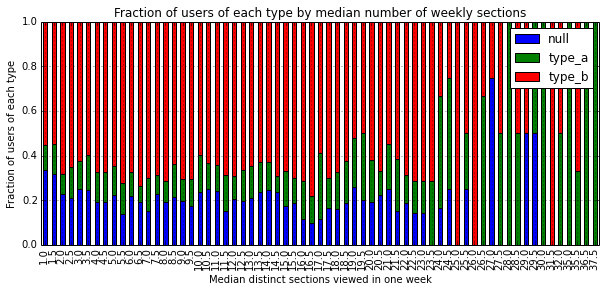

In [63]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']
test = test.groupby(['uid', 'attr1', 'week', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'week']).size().reset_index()
test = test.groupby(['uid', 'attr1']).median().reset_index()
test.columns = ['uid', 'attr1', 'median_weekly_sections']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['median_weekly_sections', 'attr1']).size().reset_index()
test = test.pivot(index = 'median_weekly_sections', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'median_weekly_sections', title = "Fraction of users of each type by median number of weekly sections")
myplot.set_xlabel("Median distinct sections viewed in one week")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

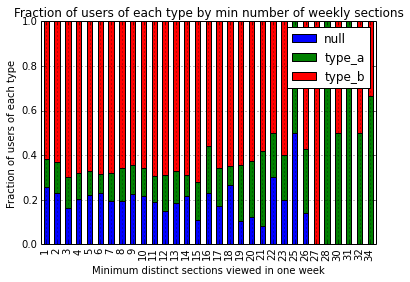

In [64]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']
test = test.groupby(['uid', 'attr1', 'week', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'week']).size().reset_index()
test = test.groupby(['uid', 'attr1']).min().reset_index()
test.columns = ['uid', 'attr1', 'min_week', 'min_weekly_sections']
test.drop(['min_week'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['min_weekly_sections', 'attr1']).size().reset_index()
test = test.pivot(index = 'min_weekly_sections', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'min_weekly_sections', title = "Fraction of users of each type by min number of weekly sections")
myplot.set_xlabel("Minimum distinct sections viewed in one week")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

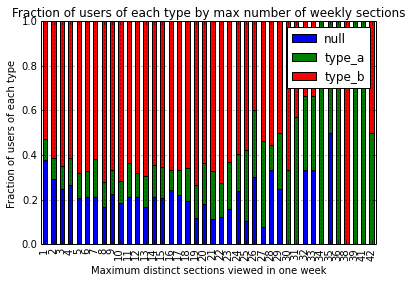

In [65]:
test = mymerged.copy()
test = pd.merge(test, weekdf, on = "DT")
test = test[test.week != 'week5']
test = test.groupby(['uid', 'attr1', 'week', 'section_code']).size().reset_index()
test = test.groupby(['uid', 'attr1', 'week']).size().reset_index()
test = test.groupby(['uid', 'attr1']).max().reset_index()
test.columns = ['uid', 'attr1', 'week_of_max_sections', 'max_weekly_sections']
test.drop(['week_of_max_sections'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['max_weekly_sections', 'attr1']).size().reset_index()
test = test.pivot(index = 'max_weekly_sections', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'max_weekly_sections', title = "Fraction of users of each type by max number of weekly sections")
myplot.set_xlabel("Maximum distinct sections viewed in one week")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

##Exploring weekend vs. weekday behavior

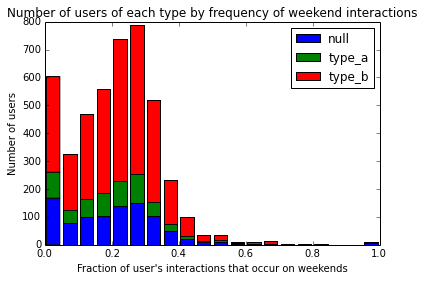

In [66]:
test = mymerged.copy()
test['weekend'] = 0
test.weekend = (test.DT.isin(weekend_days))

test = test.groupby(['uid', 'attr1', 'weekend']).size().reset_index()
test.columns = ['uid', 'attr1', 'weekend', 'count']
test = test.pivot_table(index = ['uid', 'attr1'], columns = 'weekend', values = 'count').reset_index().fillna(0)
test.columns = ['uid', 'attr1', 'week_days', 'weekend_days']
test['weekend_ratio'] = test['weekend_days']/(test['weekend_days'] + test['week_days'])
plt.hist([test[test.attr1 == 'null'].weekend_ratio, test[test.attr1 == 'type_a'].weekend_ratio, test[test.attr1 == 'type_b'].weekend_ratio], bins = 20, range = (0, 1), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Number of users of each type by frequency of weekend interactions")
plt.xlabel("Fraction of user's interactions that occur on weekends")
plt.ylabel("Number of users")
plt.legend()

test.drop(['week_days', 'weekend_days'], axis = 1, inplace = True)
ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

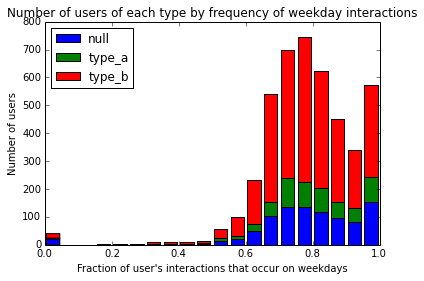

In [67]:
test = mymerged.copy()
test['weekday'] = 0
test.weekday = (test.DT.isin(weekdays))

test = test.groupby(['uid', 'attr1', 'weekday']).size().reset_index()
test.columns = ['uid', 'attr1', 'weekday', 'count']
test = test.pivot_table(index = ['uid', 'attr1'], columns = 'weekday', values = 'count').reset_index().fillna(0)
test.columns = ['uid', 'attr1', 'weekend_days', 'week_days']
test['weekday_ratio'] = test['week_days']/(test['weekend_days'] + test['week_days'])
plt.hist([test[test.attr1 == 'null'].weekday_ratio, test[test.attr1 == 'type_a'].weekday_ratio, test[test.attr1 == 'type_b'].weekday_ratio], bins = 20, range = (0, 1), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Number of users of each type by frequency of weekday interactions")
plt.xlabel("Fraction of user's interactions that occur on weekdays")
plt.ylabel("Number of users")
plt.legend(loc='upper left')

test.drop(['week_days', 'weekend_days'], axis = 1, inplace = True)
#ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

##Exploring behaviors of each day of the week

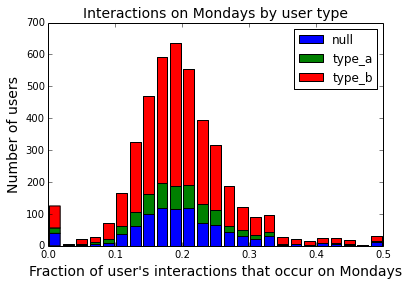

In [68]:
test = mymerged.copy()

test['Monday'] = 0
test.Monday = (test.DT.isin(Mondays))

test = test.groupby(['uid', 'attr1', 'Monday']).size().reset_index()
test.columns = ['uid', 'attr1', 'Monday', 'count']
test = test.pivot_table(index = ['uid', 'attr1'], columns = 'Monday', values = 'count').reset_index().fillna(0)
test.columns = ['uid', 'attr1', 'other', 'onMonday']
test['Monday_ratio'] = test['onMonday']/(test['onMonday'] + test['other'])
plt.hist([test[test.attr1 == 'null'].Monday_ratio, test[test.attr1 == 'type_a'].Monday_ratio, test[test.attr1 == 'type_b'].Monday_ratio], bins = 25, range = (0, 0.5), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Interactions on Mondays by user type", fontsize = 14)
plt.xlabel("Fraction of user's interactions that occur on Mondays", fontsize = 14)
plt.ylabel("Number of users", fontsize = 14)
plt.legend()

test.drop(['onMonday', 'other'], axis = 1, inplace = True)
ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

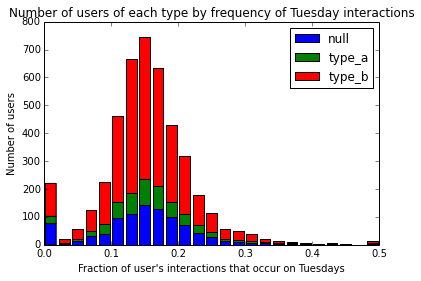

In [69]:
test = mymerged.copy()

test['Tuesday'] = 0
test.Tuesday = (test.DT.isin(Tuesdays))

test = test.groupby(['uid', 'attr1', 'Tuesday']).size().reset_index()
test.columns = ['uid', 'attr1', 'Tuesday', 'count']
test = test.pivot_table(index = ['uid', 'attr1'], columns = 'Tuesday', values = 'count').reset_index().fillna(0)
test.columns = ['uid', 'attr1', 'other', 'onTuesday']
test['Tuesday_ratio'] = test['onTuesday']/(test['onTuesday'] + test['other'])
plt.hist([test[test.attr1 == 'null'].Tuesday_ratio, test[test.attr1 == 'type_a'].Tuesday_ratio, test[test.attr1 == 'type_b'].Tuesday_ratio], bins = 25, range = (0, 0.5), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Number of users of each type by frequency of Tuesday interactions")
plt.xlabel("Fraction of user's interactions that occur on Tuesdays")
plt.ylabel("Number of users")
plt.legend()

test.drop(['onTuesday', 'other'], axis = 1, inplace = True)
ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

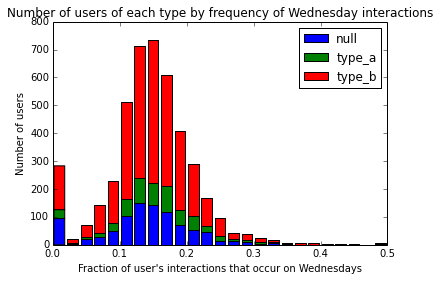

In [70]:
test = mymerged.copy()
test['Wednesday'] = 0
test.Wednesday = (test.DT.isin(Wednesdays))

test = test.groupby(['uid', 'attr1', 'Wednesday']).size().reset_index()
test.columns = ['uid', 'attr1', 'Wednesday', 'count']
test = test.pivot_table(index = ['uid', 'attr1'], columns = 'Wednesday', values = 'count').reset_index().fillna(0)
test.columns = ['uid', 'attr1', 'other', 'onWednesday']
test['Wednesday_ratio'] = test['onWednesday']/(test['onWednesday'] + test['other'])
plt.hist([test[test.attr1 == 'null'].Wednesday_ratio, test[test.attr1 == 'type_a'].Wednesday_ratio, test[test.attr1 == 'type_b'].Wednesday_ratio], bins = 25, range = (0, 0.5), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Number of users of each type by frequency of Wednesday interactions")
plt.xlabel("Fraction of user's interactions that occur on Wednesdays")
plt.ylabel("Number of users")
plt.legend()

test.drop(['onWednesday', 'other'], axis = 1, inplace = True)
ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

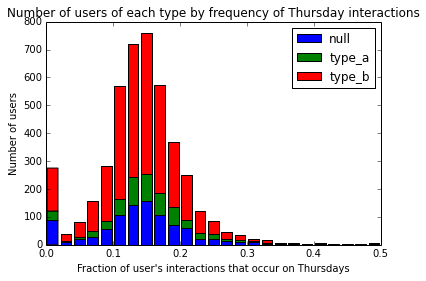

In [71]:
test = mymerged.copy()

test['Thursday'] = 0
test.Thursday = (test.DT.isin(Thursdays))

test = test.groupby(['uid', 'attr1', 'Thursday']).size().reset_index()
test.columns = ['uid', 'attr1', 'Thursday', 'count']
test = test.pivot_table(index = ['uid', 'attr1'], columns = 'Thursday', values = 'count').reset_index().fillna(0)
test.columns = ['uid', 'attr1', 'other', 'onThursday']
test['Thursday_ratio'] = test['onThursday']/(test['onThursday'] + test['other'])
plt.hist([test[test.attr1 == 'null'].Thursday_ratio, test[test.attr1 == 'type_a'].Thursday_ratio, test[test.attr1 == 'type_b'].Thursday_ratio], bins = 25, range = (0, 0.5), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Number of users of each type by frequency of Thursday interactions")
plt.xlabel("Fraction of user's interactions that occur on Thursdays")
plt.ylabel("Number of users")
plt.legend()

test.drop(['onThursday', 'other'], axis = 1, inplace = True)
ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

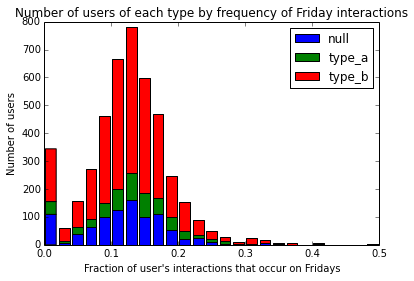

In [72]:
test = mymerged.copy()

test['Friday'] = 0
test.Friday = (test.DT.isin(Fridays))

test = test.groupby(['uid', 'attr1', 'Friday']).size().reset_index()
test.columns = ['uid', 'attr1', 'Friday', 'count']
test = test.pivot_table(index = ['uid', 'attr1'], columns = 'Friday', values = 'count').reset_index().fillna(0)
test.columns = ['uid', 'attr1', 'other', 'onFriday']
test['Friday_ratio'] = test['onFriday']/(test['onFriday'] + test['other'])
plt.hist([test[test.attr1 == 'null'].Friday_ratio, test[test.attr1 == 'type_a'].Friday_ratio, test[test.attr1 == 'type_b'].Friday_ratio], bins = 25, range = (0, 0.5), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Number of users of each type by frequency of Friday interactions")
plt.xlabel("Fraction of user's interactions that occur on Fridays")
plt.ylabel("Number of users")
plt.legend()

test.drop(['onFriday', 'other'], axis = 1, inplace = True)
ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

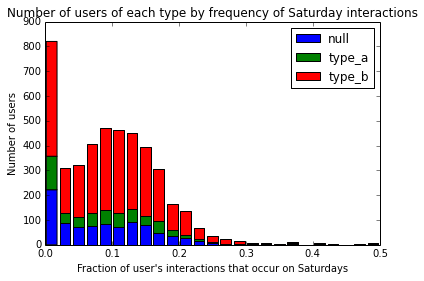

In [73]:
test = mymerged.copy()

test['Saturday'] = 0
test.Saturday = (test.DT.isin(Saturdays))

test = test.groupby(['uid', 'attr1', 'Saturday']).size().reset_index()
test.columns = ['uid', 'attr1', 'Saturday', 'count']
test = test.pivot_table(index = ['uid', 'attr1'], columns = 'Saturday', values = 'count').reset_index().fillna(0)
test.columns = ['uid', 'attr1', 'other', 'onSaturday']
test['Saturday_ratio'] = test['onSaturday']/(test['onSaturday'] + test['other'])
plt.hist([test[test.attr1 == 'null'].Saturday_ratio, test[test.attr1 == 'type_a'].Saturday_ratio, test[test.attr1 == 'type_b'].Saturday_ratio], bins = 25, range = (0, 0.5), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Number of users of each type by frequency of Saturday interactions")
plt.xlabel("Fraction of user's interactions that occur on Saturdays")
plt.ylabel("Number of users")
plt.legend()

test.drop(['onSaturday', 'other'], axis = 1, inplace = True)
ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

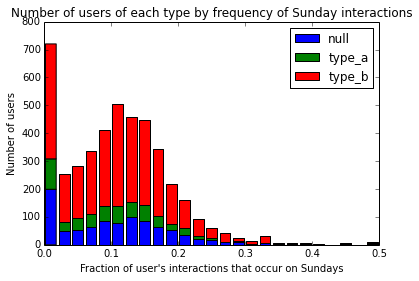

In [74]:
test = mymerged.copy()

test['Sunday'] = 0
test.Sunday = (test.DT.isin(Sundays))

test = test.groupby(['uid', 'attr1', 'Sunday']).size().reset_index()
test.columns = ['uid', 'attr1', 'Sunday', 'count']
test = test.pivot_table(index = ['uid', 'attr1'], columns = 'Sunday', values = 'count').reset_index().fillna(0)
test.columns = ['uid', 'attr1', 'other', 'onSunday']
test['Sunday_ratio'] = test['onSunday']/(test['onSunday'] + test['other'])
plt.hist([test[test.attr1 == 'null'].Sunday_ratio, test[test.attr1 == 'type_a'].Sunday_ratio, test[test.attr1 == 'type_b'].Sunday_ratio], bins = 25, range = (0, 0.5), stacked=True, color = ['b', 'g', 'r'], label = ['null', 'type_a', 'type_b'])
plt.title("Number of users of each type by frequency of Sunday interactions")
plt.xlabel("Fraction of user's interactions that occur on Sundays")
plt.ylabel("Number of users")
plt.legend()

test.drop(['onSunday', 'other'], axis = 1, inplace = True)
ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

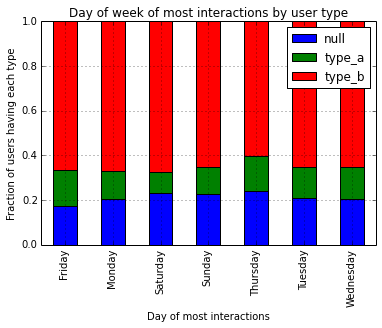

In [75]:
test = mymerged.copy()
test = pd.merge(test, daynamedf, on = "DT")
test = test.groupby(['uid', 'attr1', 'dayname']).size().reset_index()
test.columns = ['uid', 'attr1', 'day_most_interactions', 'num_interactions']
test = test.sort("num_interactions", ascending = False).groupby(['uid', 'attr1']).nth(0).reset_index()
test.drop(['num_interactions'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['day_most_interactions', 'attr1']).size().reset_index()
test = test.pivot(index='day_most_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'day_most_interactions', title = "Day of week of most interactions by user type")
myplot.set_xlabel("Day of most interactions")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)

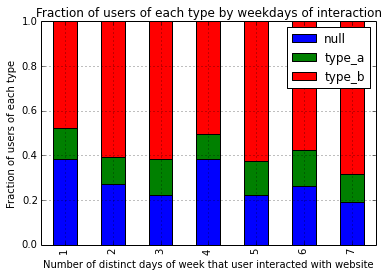

In [76]:
test = mymerged.copy()
test = pd.merge(test, daynamedf, on = "DT")
test = test.groupby(['uid', 'attr1', 'dayname']).size().reset_index()
test = test.groupby(['uid', 'attr1']).size().reset_index()
test.columns = ['uid', 'attr1', 'num_days_of_week']

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['attr1', 'num_days_of_week']).size().reset_index()
test.columns = ['attr1', 'num_days_of_week', 'count']
test = test.pivot(index='num_days_of_week', columns='attr1', values = 'count').reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'num_days_of_week', title = "Fraction of users of each type by weekdays of interaction")
myplot.set_xlabel("Number of distinct days of week that user interacted with website")
myplot.set_ylabel("Fraction of users of each type")
myplot.legend(framealpha=1)

##Exploring user type by first or last day of interaction

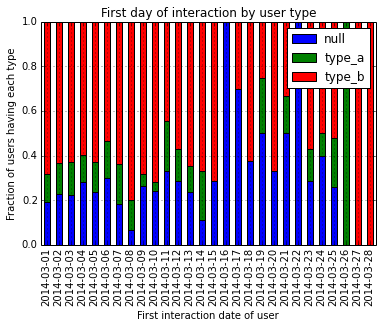

In [77]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1'])['DT'].min().reset_index()

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])
ds_test_demog_out_plus_features = ds_test_demog_out_plus_features.rename(columns = {"DT": "first_interaction"})

test = test.groupby(['DT', 'attr1']).size().reset_index()
test = test.pivot(index='DT', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'DT', title = "First day of interaction by user type")
myplot.set_xlabel("First interaction date of user")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)

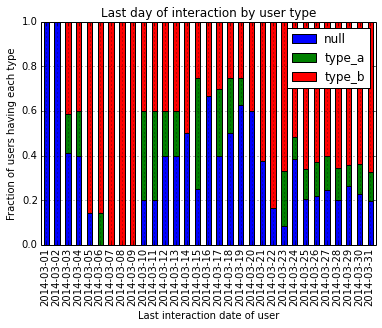

In [78]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1'])['DT'].max().reset_index()

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])
ds_test_demog_out_plus_features = ds_test_demog_out_plus_features.rename(columns = {"DT": "last_interaction"})

test = test.groupby(['DT', 'attr1']).size().reset_index()
test = test.pivot(index='DT', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'DT', title = "Last day of interaction by user type")
myplot.set_xlabel("Last interaction date of user")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)

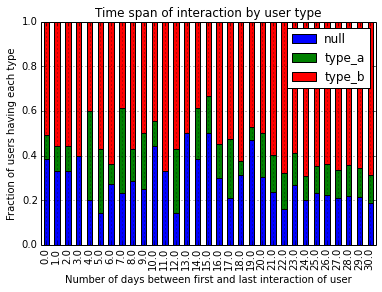

In [79]:
test1 = mymerged.copy()
test2 = mymerged.copy()
test1 = test1.groupby(['uid', 'attr1'])['DT'].min().reset_index()
test2 = test2.groupby(['uid', 'attr1'])['DT'].max().reset_index()
test = pd.merge(test1, test2, on = ["uid", "attr1"])

test['deltat'] = 0
test.DT_y = pd.to_datetime(test.DT_y)
test.DT_x = pd.to_datetime(test.DT_x)
test.deltat = pd.to_timedelta(test.DT_y - test.DT_x).astype('timedelta64[D]')
test.drop(['DT_x', 'DT_y'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['deltat', 'attr1']).size().reset_index()
test = test.pivot(index='deltat', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'deltat', title = "Time span of interaction by user type")
myplot.set_xlabel("Number of days between first and last interaction of user")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)

##Constructing features: favorite section, device type, region, date of interaction

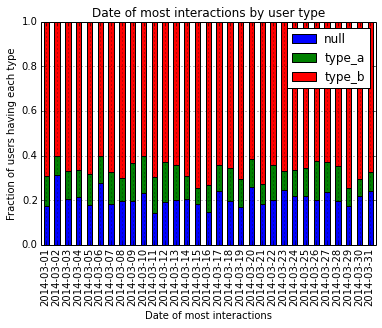

In [80]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'DT']).size().reset_index()
test.columns = ['uid', 'attr1', 'DT_most_interactions', 'num_interactions']
test = test.sort("num_interactions", ascending = False).groupby(['uid', 'attr1']).first().reset_index()
test.drop(['num_interactions'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['DT_most_interactions', 'attr1']).size().reset_index()
test = test.pivot(index='DT_most_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'DT_most_interactions', title = "Date of most interactions by user type")
myplot.set_xlabel("Date of most interactions")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)

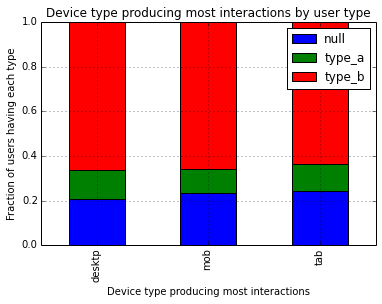

In [81]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'dvc_type']).size().reset_index()
test.columns = ['uid', 'attr1', 'dvc_type_most_interactions', 'num_interactions']
test = test.sort("num_interactions", ascending = False).groupby(['uid', 'attr1']).first().reset_index()
test.drop(['num_interactions'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['dvc_type_most_interactions', 'attr1']).size().reset_index()
test = test.pivot(index='dvc_type_most_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'dvc_type_most_interactions', title = "Device type producing most interactions by user type")
myplot.set_xlabel("Device type producing most interactions")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)

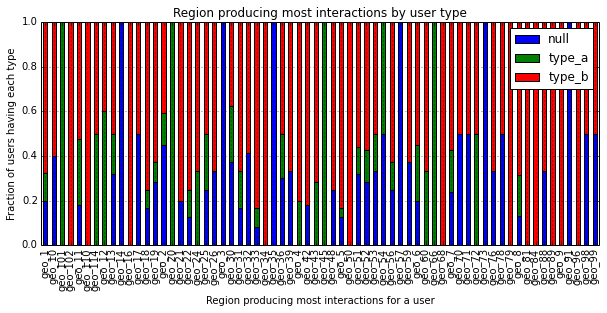

In [82]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'geo_code']).size().reset_index()
test.columns = ['uid', 'attr1', 'geo_code_most_interactions', 'num_interactions']
test = test.sort("num_interactions", ascending = False).groupby(['uid', 'attr1']).first().reset_index()
test.drop(['num_interactions'], axis = 1, inplace = True)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['geo_code_most_interactions', 'attr1']).size().reset_index()
test = test.pivot(index='geo_code_most_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'geo_code_most_interactions', title = "Region producing most interactions by user type")
myplot.set_xlabel("Region producing most interactions for a user")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)

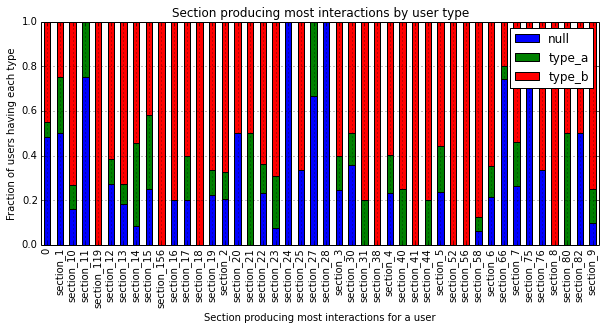

In [83]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'section_code']).size().reset_index()
test.columns = ['uid', 'attr1', 'section_code_most_interactions', 'num_interactions']
test = test.sort("num_interactions", ascending = False).groupby(['uid', 'attr1']).nth(0).reset_index()
test.drop(['num_interactions'], axis = 1, inplace = True)

test_allids = mymerged.copy()
test_allids = test_allids.groupby(['uid', 'attr1']).size().reset_index()
test_allids.drop(0, axis = 1, inplace = True)
test = pd.merge(test_allids, test, on = ['uid', 'attr1'], how = "left").fillna(0)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['section_code_most_interactions', 'attr1']).size().reset_index()
test = test.pivot(index='section_code_most_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'section_code_most_interactions', title = "Section producing most interactions by user type")
myplot.set_xlabel("Section producing most interactions for a user")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)

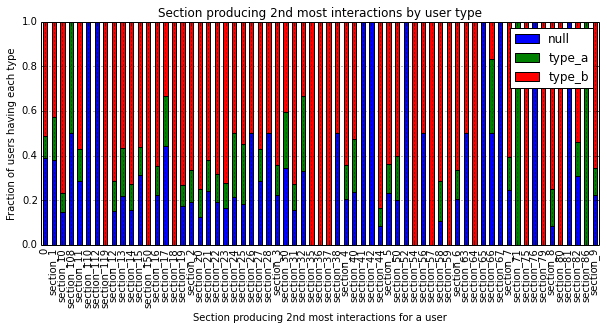

In [84]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'section_code']).size().reset_index()
test.columns = ['uid', 'attr1', 'section_code_2ndmost_interactions', 'num_interactions']
test = test.sort("num_interactions", ascending = False).groupby(['uid', 'attr1']).nth(1).reset_index()
test.drop(['num_interactions'], axis = 1, inplace = True)

test_allids = mymerged.copy()
test_allids = test_allids.groupby(['uid', 'attr1']).size().reset_index()
test_allids.drop(0, axis = 1, inplace = True)
test = pd.merge(test_allids, test, on = ['uid', 'attr1'], how = "left").fillna(0)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['section_code_2ndmost_interactions', 'attr1']).size().reset_index()
test = test.pivot(index='section_code_2ndmost_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'section_code_2ndmost_interactions', title = "Section producing 2nd most interactions by user type")
myplot.set_xlabel("Section producing 2nd most interactions for a user")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)

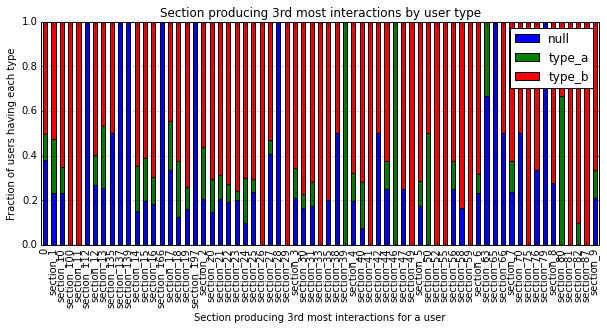

In [85]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'section_code']).size().reset_index()
test.columns = ['uid', 'attr1', 'section_code_3rdmost_interactions', 'num_interactions']
test = test.sort("num_interactions", ascending = False).groupby(['uid', 'attr1']).nth(2).reset_index()
test.drop(['num_interactions'], axis = 1, inplace = True)

test_allids = mymerged.copy()
test_allids = test_allids.groupby(['uid', 'attr1']).size().reset_index()
test_allids.drop(0, axis = 1, inplace = True)
test = pd.merge(test_allids, test, on = ['uid', 'attr1'], how = "left").fillna(0)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['section_code_3rdmost_interactions', 'attr1']).size().reset_index()
test = test.pivot(index='section_code_3rdmost_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'section_code_3rdmost_interactions', title = "Section producing 3rd most interactions by user type")

myplot.set_xlabel("Section producing 3rd most interactions for a user")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)
plt.figure(figsize=(20,10)) 

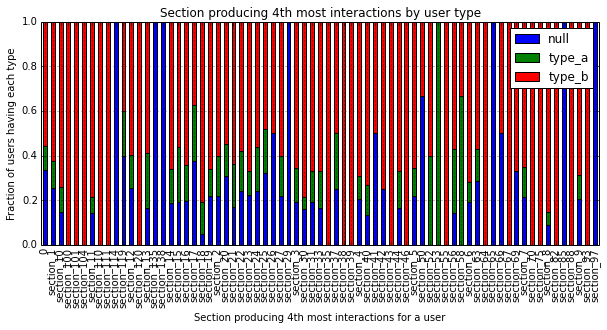

In [86]:
test = mymerged.copy()
test = test.groupby(['uid', 'attr1', 'section_code']).size().reset_index()
test.columns = ['uid', 'attr1', 'section_code_4thmost_interactions', 'num_interactions']
test = test.sort("num_interactions", ascending = False).groupby(['uid', 'attr1']).nth(3).reset_index()
test.drop(['num_interactions'], axis = 1, inplace = True)

test_allids = mymerged.copy()
test_allids = test_allids.groupby(['uid', 'attr1']).size().reset_index()
test_allids.drop(0, axis = 1, inplace = True)
test = pd.merge(test_allids, test, on = ['uid', 'attr1'], how = "left").fillna(0)

ds_test_demog_out_plus_features = pd.merge(ds_test_demog_out_plus_features, test, on = ["uid", "attr1"])

test = test.groupby(['section_code_4thmost_interactions', 'attr1']).size().reset_index()
test = test.pivot(index='section_code_4thmost_interactions', columns='attr1', values = 0).reset_index().fillna(0)
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, figsize = (10, 4), x = 'section_code_4thmost_interactions', title = "Section producing 4th most interactions by user type")

myplot.set_xlabel("Section producing 4th most interactions for a user")
myplot.set_ylabel("Fraction of users having each type")
myplot.legend(framealpha=1)
plt.figure(figsize=(20,10)) 

##Reviewing the ds_test_demog_out_plus_features table (includes all engineered features)

In [87]:
ds_test_demog_out_plus_features.shape

(4421, 57)

In [88]:
ds_test_demog_out_plus_features.columns

Index([                              u'uid',
                                   u'attr1',
                                   u'attr2',
                      u'total_interactions',
            u'total_views_all_interactions',
              u'mean_views_per_interaction',
            u'median_views_per_interaction',
               u'min_views_per_interaction',
               u'max_views_per_interaction',
                        u'num_device_types',
                           u'num_geo_codes',
                                u'num_days',
                  u'total_sections_visited',
                 u'mean_daily_interactions',
                  u'med_daily_interactions',
                  u'min_daily_interactions',
                  u'max_daily_interactions',
                u'mean_weekly_interactions',
                 u'med_weekly_interactions',
                 u'min_weekly_interactions',
                 u'max_weekly_interactions',
                        u'mean_daily_views',
          

In [89]:
ds_test_demog_out_plus_features.head()

,uid,attr1,attr2,total_interactions,total_views_all_interactions,mean_views_per_interaction,median_views_per_interaction,min_views_per_interaction,max_views_per_interaction,num_device_types,...,first_interaction,last_interaction,deltat,DT_most_interactions,dvc_type_most_interactions,geo_code_most_interactions,section_code_most_interactions,section_code_2ndmost_interactions,section_code_3rdmost_interactions,section_code_4thmost_interactions
0,AAA-1,type_a,null,144,1467,38.605263,36.0,5,96,3,...,2014-03-01,2014-03-31,30,2014-03-28,desktp,geo_1,section_2,section_10,section_4,section_14
1,AAA-100,type_b,null,197,964,40.166667,39.0,15,86,2,...,2014-03-01,2014-03-31,30,2014-03-16,desktp,geo_1,section_2,section_40,section_14,section_3
2,AAA-1002,type_a,null,44,59,19.666667,24.0,4,31,1,...,2014-03-06,2014-03-28,22,2014-03-12,desktp,geo_1,section_2,section_6,section_7,section_5
3,AAA-1003,type_b,null,121,844,33.760000,35.0,11,78,1,...,2014-03-01,2014-03-31,30,2014-03-20,desktp,geo_1,section_2,section_31,section_10,section_7
4,AAA-1005,type_b,b,51,796,33.166667,27.5,8,78,1,...,2014-03-01,2014-03-31,30,2014-03-29,desktp,geo_1,section_2,section_40,section_14,section_10


In [90]:
ds_test_demog_out_plus_features.to_csv("ds_test_demog_out_plus_features.csv")

##Trying random forest classifier: train on entire dataset

In [91]:
mytrain_features = ds_test_demog_out_plus_features.copy()
mytrain_features = mytrain_features[mytrain_features.attr1 != 'null']
mytrain_attr1 = mytrain_features.attr1
mytrain_features.drop(['attr1', 'uid'], axis = 1, inplace = True)

le0 = pp.LabelEncoder()
le0.fit(mytrain_features.attr2.values)
mytrain_features[['attr2']] = le0.transform(mytrain_features.attr2.values)
le1 = pp.LabelEncoder()
le1.fit(mytrain_features.first_interaction.values)
mytrain_features[['first_interaction']] = le1.transform(mytrain_features.first_interaction.values)
le2 = pp.LabelEncoder()
le2.fit(mytrain_features.last_interaction.values)
mytrain_features[['last_interaction']] = le2.transform(mytrain_features.last_interaction.values)
le3 = pp.LabelEncoder()
le3.fit(mytrain_features.DT_most_interactions.values)
mytrain_features[['DT_most_interactions']] = le3.transform(mytrain_features.DT_most_interactions.values)
le4 = pp.LabelEncoder()
le4.fit(mytrain_features.dvc_type_most_interactions.values)
mytrain_features[['dvc_type_most_interactions']] = le4.transform(mytrain_features.dvc_type_most_interactions.values)
le5 = pp.LabelEncoder()
le5.fit(mytrain_features.geo_code_most_interactions.values)
mytrain_features[['geo_code_most_interactions']] = le5.transform(mytrain_features.geo_code_most_interactions.values)
le6 = pp.LabelEncoder()
le6.fit(mytrain_features.section_code_most_interactions.values)
mytrain_features[['section_code_most_interactions']] = le6.transform(mytrain_features.section_code_most_interactions.values)
le7 = pp.LabelEncoder()
le7.fit(mytrain_features.section_code_2ndmost_interactions.values)
mytrain_features[['section_code_2ndmost_interactions']] = le7.transform(mytrain_features.section_code_2ndmost_interactions.values)
le8 = pp.LabelEncoder()
le8.fit(mytrain_features.section_code_3rdmost_interactions.values)
mytrain_features[['section_code_3rdmost_interactions']] = le8.transform(mytrain_features.section_code_3rdmost_interactions.values)
le9 = pp.LabelEncoder()
le9.fit(mytrain_features.section_code_4thmost_interactions.values)
mytrain_features[['section_code_4thmost_interactions']] = le9.transform(mytrain_features.section_code_4thmost_interactions.values)
le10 = pp.LabelEncoder()
le10.fit(mytrain_features.day_most_interactions.values)
mytrain_features[['day_most_interactions']] = le10.transform(mytrain_features.day_most_interactions.values)

myRFC = RFC(n_estimators = 50)
myRFC.fit(mytrain_features, mytrain_attr1)

print myRFC.score(mytrain_features, mytrain_attr1)
mytrain_attr1_predicted = myRFC.predict(mytrain_features)

0.999713713141


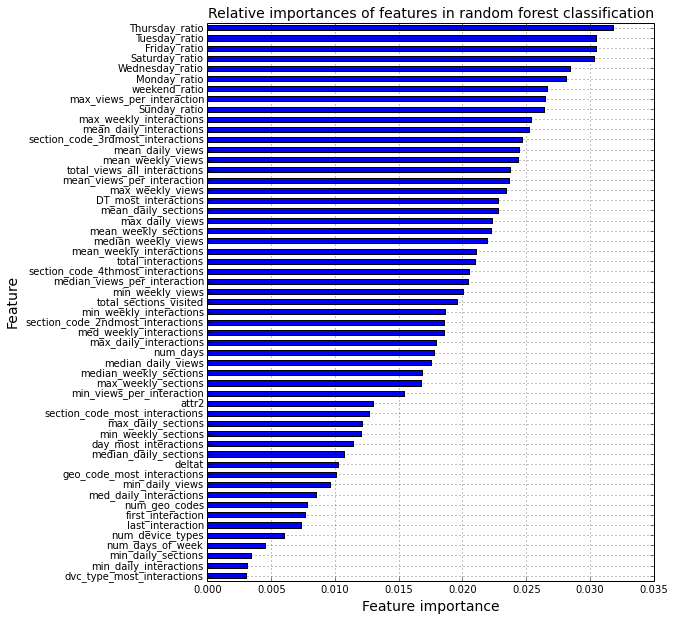

In [92]:
features = pd.DataFrame()
features['feature'] = mytrain_features.columns
features['importance'] = myRFC.feature_importances_
features = features.sort('importance', ascending = True)

myplot = features.plot(kind='barh', x = 'feature', figsize = (8, 10), legend = False)
myplot.set_title("Relative importances of features in random forest classification", fontsize = 14)
myplot.set_ylabel("Feature", fontsize = 14)
myplot.set_xlabel("Feature importance", fontsize = 14)

##Trying random forest classifier: train on random portion of dataset, test on rest

In [93]:
demog_data = ds_test_demog_out_plus_features.copy()
demog_data = demog_data[demog_data.attr1 != 'null']
random_rows = random.sample(demog_data.index, 2800)
demog_data_train = demog_data.ix[random_rows]
demog_data_test = demog_data.drop(random_rows)
print len(demog_data_train), len(demog_data_test)

2800 693


In [94]:
features_to_drop = ['attr1', 'uid', 'median_views_per_interaction',
                    'med_daily_interactions', 'med_weekly_interactions',
                    'median_daily_views', 'median_weekly_views',
                    'median_daily_sections', 'median_weekly_sections',
                    'min_views_per_interaction',
                    'min_daily_interactions', 'min_weekly_interactions',
                    'min_daily_views', 'min_weekly_views',
                    'min_daily_sections', 'min_weekly_sections',
                    'num_device_types', 'dvc_type_most_interactions',
                    'num_geo_codes', 'geo_code_most_interactions', 
                    'deltat', 'first_interaction', 'last_interaction']

In [95]:
demog_data_train_features = demog_data_train.copy()
demog_data_train_attr1 = demog_data_train_features.attr1
demog_data_train_features.drop(features_to_drop, axis = 1, inplace = True)

le0 = pp.LabelEncoder()
le0.fit(demog_data_train_features.attr2.values)
demog_data_train_features[['attr2']] = le0.transform(demog_data_train_features.attr2.values)

"""
le1 = pp.LabelEncoder()
le1.fit(demog_data_train_features.first_interaction.values)
demog_data_train_features[['first_interaction']] = le1.transform(demog_data_train_features.first_interaction.values)
le2 = pp.LabelEncoder()
le2.fit(demog_data_train_features.last_interaction.values)
demog_data_train_features[['last_interaction']] = le2.transform(demog_data_train_features.last_interaction.values)
"""
le3 = pp.LabelEncoder()
le3.fit(demog_data_train_features.DT_most_interactions.values)
demog_data_train_features[['DT_most_interactions']] = le3.transform(demog_data_train_features.DT_most_interactions.values)

"""
le4 = pp.LabelEncoder()
le4.fit(demog_data_train_features.dvc_type_most_interactions.values)
demog_data_train_features[['dvc_type_most_interactions']] = le4.transform(demog_data_train_features.dvc_type_most_interactions.values)
le5 = pp.LabelEncoder()
le5.fit(demog_data_train_features.geo_code_most_interactions.values)
demog_data_train_features[['geo_code_most_interactions']] = le5.transform(demog_data_train_features.geo_code_most_interactions.values)
"""

le6 = pp.LabelEncoder()
le6.fit(demog_data_train_features.section_code_most_interactions.values)
demog_data_train_features[['section_code_most_interactions']] = le6.transform(demog_data_train_features.section_code_most_interactions.values)
le7 = pp.LabelEncoder()
le7.fit(demog_data_train_features.section_code_2ndmost_interactions.values)
demog_data_train_features[['section_code_2ndmost_interactions']] = le7.transform(demog_data_train_features.section_code_2ndmost_interactions.values)
le8 = pp.LabelEncoder()
le8.fit(demog_data_train_features.section_code_3rdmost_interactions.values)
demog_data_train_features[['section_code_3rdmost_interactions']] = le8.transform(demog_data_train_features.section_code_3rdmost_interactions.values)
le9 = pp.LabelEncoder()
le9.fit(demog_data_train_features.section_code_4thmost_interactions.values)
demog_data_train_features[['section_code_4thmost_interactions']] = le9.transform(demog_data_train_features.section_code_4thmost_interactions.values)
le10 = pp.LabelEncoder()
le10.fit(demog_data_train_features.day_most_interactions.values)
demog_data_train_features[['day_most_interactions']] = le10.transform(demog_data_train_features.day_most_interactions.values)


myRFC = RFC(n_estimators = 50)
myRFC.fit(demog_data_train_features, demog_data_train_attr1)

print myRFC.score(demog_data_train_features, demog_data_train_attr1)
demog_data_train_predicted = myRFC.predict(demog_data_train_features)

0.999285714286


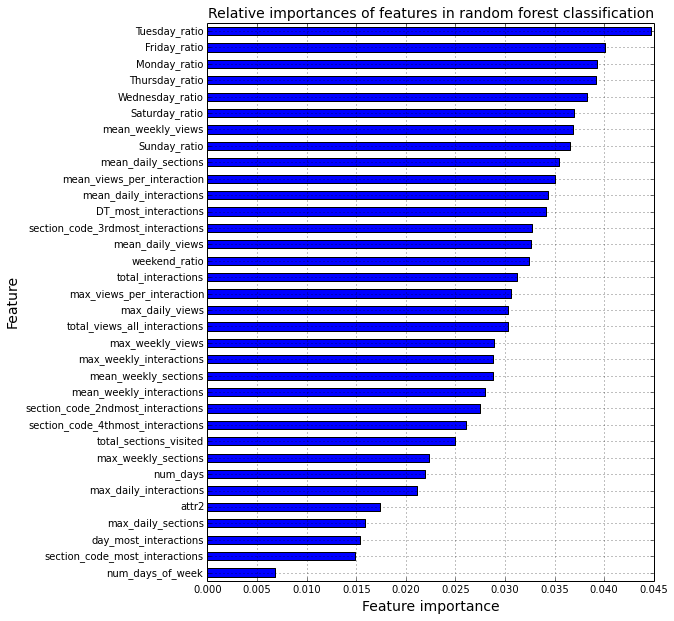

In [96]:
features = pd.DataFrame()
features['feature'] = demog_data_train_features.columns
features['importance'] = myRFC.feature_importances_
features = features.sort('importance', ascending = True)

myplot = features.plot(kind='barh', x = 'feature', figsize = (8, 10), legend = False)
myplot.set_title("Relative importances of features in random forest classification", fontsize = 14)
myplot.set_ylabel("Feature", fontsize = 14)
myplot.set_xlabel("Feature importance", fontsize = 14)

In [97]:
demog_data_test_features = demog_data_test.copy()
demog_data_test_attr1 = demog_data_test_features.attr1
demog_data_test_features.drop(features_to_drop, axis = 1, inplace = True)


le0 = pp.LabelEncoder()
le0.fit(demog_data_test_features.attr2.values)
demog_data_test_features[['attr2']] = le0.transform(demog_data_test_features.attr2.values)
"""
le1 = pp.LabelEncoder()
le1.fit(demog_data_test_features.first_interaction.values)
demog_data_test_features[['first_interaction']] = le1.transform(demog_data_test_features.first_interaction.values)
le2 = pp.LabelEncoder()
le2.fit(demog_data_test_features.last_interaction.values)
demog_data_test_features[['last_interaction']] = le2.transform(demog_data_test_features.last_interaction.values)

"""
le3 = pp.LabelEncoder()
le3.fit(demog_data_test_features.DT_most_interactions.values)
demog_data_test_features[['DT_most_interactions']] = le3.transform(demog_data_test_features.DT_most_interactions.values)
"""
le4 = pp.LabelEncoder()
le4.fit(demog_data_test_features.dvc_type_most_interactions.values)
demog_data_test_features[['dvc_type_most_interactions']] = le4.transform(demog_data_test_features.dvc_type_most_interactions.values)
le5 = pp.LabelEncoder()
le5.fit(demog_data_test_features.geo_code_most_interactions.values)
demog_data_test_features[['geo_code_most_interactions']] = le5.transform(demog_data_test_features.geo_code_most_interactions.values)
"""

le6 = pp.LabelEncoder()
le6.fit(demog_data_test_features.section_code_most_interactions.values)
demog_data_test_features[['section_code_most_interactions']] = le6.transform(demog_data_test_features.section_code_most_interactions.values)
le7 = pp.LabelEncoder()
le7.fit(demog_data_test_features.section_code_2ndmost_interactions.values)
demog_data_test_features[['section_code_2ndmost_interactions']] = le7.transform(demog_data_test_features.section_code_2ndmost_interactions.values)
le8 = pp.LabelEncoder()
le8.fit(demog_data_test_features.section_code_3rdmost_interactions.values)
demog_data_test_features[['section_code_3rdmost_interactions']] = le8.transform(demog_data_test_features.section_code_3rdmost_interactions.values)
le9 = pp.LabelEncoder()
le9.fit(demog_data_test_features.section_code_4thmost_interactions.values)
demog_data_test_features[['section_code_4thmost_interactions']] = le9.transform(demog_data_test_features.section_code_4thmost_interactions.values)
le10 = pp.LabelEncoder()
le10.fit(demog_data_test_features.day_most_interactions.values)
demog_data_test_features[['day_most_interactions']] = le10.transform(demog_data_test_features.day_most_interactions.values)


print myRFC.score(demog_data_test_features, demog_data_test_attr1)
demog_data_test_predicted = myRFC.predict(demog_data_test_features)

0.831168831169


In [98]:
aCorrect = 0 #number of type_a users correctly predicted
bCorrect = 0 #number of type_b users correctly predicted
aIncorrectB = 0 #type_a users incorrectly predicted as type_b users
bIncorrectA = 0 #type_b users incorrectly predicted as type_a users
for i in range(len(demog_data_test_attr1)):
    if demog_data_test_attr1.iloc[i] == demog_data_test_predicted[i]:
        if demog_data_test_attr1.iloc[i] == 'type_a':
            aCorrect += 1
        else:
            bCorrect += 1
    if demog_data_test_attr1.iloc[i] != demog_data_test_predicted[i]:
        if demog_data_test_attr1.iloc[i] == 'type_a':
            aIncorrectB += 1
        else:
            bIncorrectA += 1

print aCorrect, bCorrect, aIncorrectB, bIncorrectA   
    

2 574 116 1


##Trying random forest classifier: throwing out type_b data from training set to balance classes

In [99]:
demog_data = ds_test_demog_out_plus_features.copy()
demog_data = demog_data[demog_data.attr1 != 'null']
random_rows = random.sample(demog_data.index, 2800)
demog_data_train = demog_data.ix[random_rows]
demog_data_test = demog_data.drop(random_rows)

demog_data_train_b = demog_data_train[demog_data_train.attr1 == 'type_b']
random_b_rows = random.sample(demog_data_train_b.index, 1500)
demog_data_train = demog_data_train.drop(random_b_rows)
print len(demog_data_train), len(demog_data_test)

1300 693


In [100]:
demog_data_train_features = demog_data_train.copy()
demog_data_train_attr1 = demog_data_train_features.attr1
demog_data_train_features.drop(features_to_drop, axis = 1, inplace = True)

le0 = pp.LabelEncoder()
le0.fit(demog_data_train_features.attr2.values)
demog_data_train_features[['attr2']] = le0.transform(demog_data_train_features.attr2.values)

"""
le1 = pp.LabelEncoder()
le1.fit(demog_data_train_features.first_interaction.values)
demog_data_train_features[['first_interaction']] = le1.transform(demog_data_train_features.first_interaction.values)
le2 = pp.LabelEncoder()
le2.fit(demog_data_train_features.last_interaction.values)
demog_data_train_features[['last_interaction']] = le2.transform(demog_data_train_features.last_interaction.values)
"""
le3 = pp.LabelEncoder()
le3.fit(demog_data_train_features.DT_most_interactions.values)
demog_data_train_features[['DT_most_interactions']] = le3.transform(demog_data_train_features.DT_most_interactions.values)

"""
le4 = pp.LabelEncoder()
le4.fit(demog_data_train_features.dvc_type_most_interactions.values)
demog_data_train_features[['dvc_type_most_interactions']] = le4.transform(demog_data_train_features.dvc_type_most_interactions.values)
le5 = pp.LabelEncoder()
le5.fit(demog_data_train_features.geo_code_most_interactions.values)
demog_data_train_features[['geo_code_most_interactions']] = le5.transform(demog_data_train_features.geo_code_most_interactions.values)
"""
le6 = pp.LabelEncoder()
le6.fit(demog_data_train_features.section_code_most_interactions.values)
demog_data_train_features[['section_code_most_interactions']] = le6.transform(demog_data_train_features.section_code_most_interactions.values)
le7 = pp.LabelEncoder()
le7.fit(demog_data_train_features.section_code_2ndmost_interactions.values)
demog_data_train_features[['section_code_2ndmost_interactions']] = le7.transform(demog_data_train_features.section_code_2ndmost_interactions.values)
le8 = pp.LabelEncoder()
le8.fit(demog_data_train_features.section_code_3rdmost_interactions.values)
demog_data_train_features[['section_code_3rdmost_interactions']] = le8.transform(demog_data_train_features.section_code_3rdmost_interactions.values)
le9 = pp.LabelEncoder()
le9.fit(demog_data_train_features.section_code_4thmost_interactions.values)
demog_data_train_features[['section_code_4thmost_interactions']] = le9.transform(demog_data_train_features.section_code_4thmost_interactions.values)
le10 = pp.LabelEncoder()
le10.fit(demog_data_train_features.day_most_interactions.values)
demog_data_train_features[['day_most_interactions']] = le10.transform(demog_data_train_features.day_most_interactions.values)

myRFC = RFC(n_estimators = 50)
myRFC.fit(demog_data_train_features, demog_data_train_attr1)

print myRFC.score(demog_data_train_features, demog_data_train_attr1)
demog_data_train_predicted = myRFC.predict(demog_data_train_features)

1.0


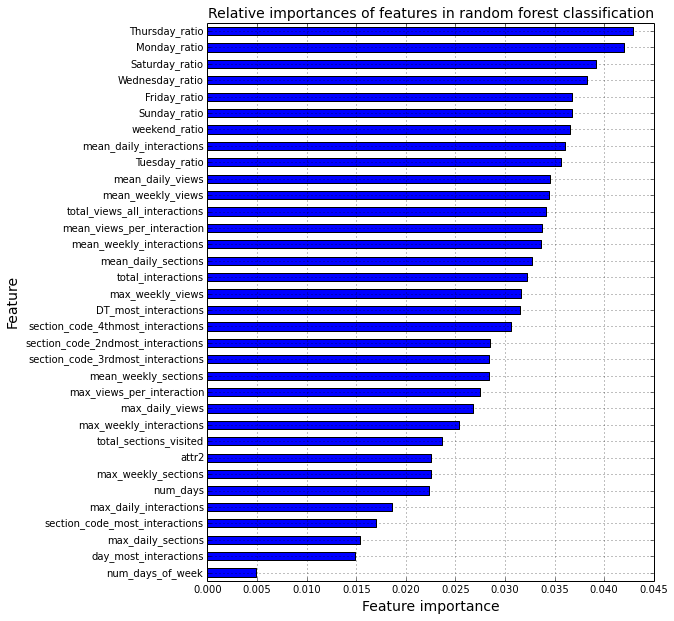

In [101]:
features = pd.DataFrame()
features['feature'] = demog_data_train_features.columns
features['importance'] = myRFC.feature_importances_
features = features.sort('importance', ascending = True)

myplot = features.plot(kind='barh', x = 'feature', figsize = (8, 10), legend = False)
myplot.set_title("Relative importances of features in random forest classification", fontsize = 14)
myplot.set_ylabel("Feature", fontsize = 14)
myplot.set_xlabel("Feature importance", fontsize = 14)

In [102]:
demog_data_test_features = demog_data_test.copy()
demog_data_test_attr1 = demog_data_test_features.attr1
demog_data_test_features.drop(features_to_drop, axis = 1, inplace = True)

le0 = pp.LabelEncoder()
le0.fit(demog_data_test_features.attr2.values)
demog_data_test_features[['attr2']] = le0.transform(demog_data_test_features.attr2.values)
"""
le1 = pp.LabelEncoder()
le1.fit(demog_data_test_features.first_interaction.values)
demog_data_test_features[['first_interaction']] = le1.transform(demog_data_test_features.first_interaction.values)
le2 = pp.LabelEncoder()
le2.fit(demog_data_test_features.last_interaction.values)
demog_data_test_features[['last_interaction']] = le2.transform(demog_data_test_features.last_interaction.values)
"""
le3 = pp.LabelEncoder()
le3.fit(demog_data_test_features.DT_most_interactions.values)
demog_data_test_features[['DT_most_interactions']] = le3.transform(demog_data_test_features.DT_most_interactions.values)
"""
le4 = pp.LabelEncoder()
le4.fit(demog_data_test_features.dvc_type_most_interactions.values)
demog_data_test_features[['dvc_type_most_interactions']] = le4.transform(demog_data_test_features.dvc_type_most_interactions.values)
le5 = pp.LabelEncoder()
le5.fit(demog_data_test_features.geo_code_most_interactions.values)
demog_data_test_features[['geo_code_most_interactions']] = le5.transform(demog_data_test_features.geo_code_most_interactions.values)
"""
le6 = pp.LabelEncoder()
le6.fit(demog_data_test_features.section_code_most_interactions.values)
demog_data_test_features[['section_code_most_interactions']] = le6.transform(demog_data_test_features.section_code_most_interactions.values)
le7 = pp.LabelEncoder()
le7.fit(demog_data_test_features.section_code_2ndmost_interactions.values)
demog_data_test_features[['section_code_2ndmost_interactions']] = le7.transform(demog_data_test_features.section_code_2ndmost_interactions.values)
le8 = pp.LabelEncoder()
le8.fit(demog_data_test_features.section_code_3rdmost_interactions.values)
demog_data_test_features[['section_code_3rdmost_interactions']] = le8.transform(demog_data_test_features.section_code_3rdmost_interactions.values)
le9 = pp.LabelEncoder()
le9.fit(demog_data_test_features.section_code_4thmost_interactions.values)
demog_data_test_features[['section_code_4thmost_interactions']] = le9.transform(demog_data_test_features.section_code_4thmost_interactions.values)
le10 = pp.LabelEncoder()
le10.fit(demog_data_test_features.day_most_interactions.values)
demog_data_test_features[['day_most_interactions']] = le10.transform(demog_data_test_features.day_most_interactions.values)

print myRFC.score(demog_data_test_features, demog_data_test_attr1)
demog_data_test_predicted = myRFC.predict(demog_data_test_features)

0.774891774892


In [103]:
aCorrect = 0 #number of type_a users correctly predicted
bCorrect = 0 #number of type_b users correctly predicted
aIncorrectB = 0 #type_a users incorrectly predicted as type_b users
bIncorrectA = 0 #type_b users incorrectly predicted as type_a users
for i in range(len(demog_data_test_attr1)):
    if demog_data_test_attr1.iloc[i] == demog_data_test_predicted[i]:
        if demog_data_test_attr1.iloc[i] == 'type_a':
            aCorrect += 1
        else:
            bCorrect += 1
    if demog_data_test_attr1.iloc[i] != demog_data_test_predicted[i]:
        if demog_data_test_attr1.iloc[i] == 'type_a':
            aIncorrectB += 1
        else:
            bIncorrectA += 1

print aCorrect, bCorrect, aIncorrectB, bIncorrectA   

26 511 80 76


##Predicting attr1 for null-valued users using already-trained classifier

In [104]:
null_data = ds_test_demog_out_plus_features.copy()
null_data = null_data[null_data.attr1 == 'null']
null_data.drop(features_to_drop, axis = 1, inplace = True)

le0 = pp.LabelEncoder()
le0.fit(null_data.attr2.values)
null_data[['attr2']] = le0.transform(null_data.attr2.values)
#le1 = pp.LabelEncoder()
#le1.fit(null_data.first_interaction.values)
#null_data[['first_interaction']] = le1.transform(null_data.first_interaction.values)
#le2 = pp.LabelEncoder()
#le2.fit(null_data.last_interaction.values)
#null_data[['last_interaction']] = le2.transform(null_data.last_interaction.values)
le3 = pp.LabelEncoder()
le3.fit(null_data.DT_most_interactions.values)
null_data[['DT_most_interactions']] = le3.transform(null_data.DT_most_interactions.values)
#le4 = pp.LabelEncoder()
#le4.fit(null_data.dvc_type_most_interactions.values)
#null_data[['dvc_type_most_interactions']] = le4.transform(null_data.dvc_type_most_interactions.values)
#le5 = pp.LabelEncoder()
#le5.fit(null_data.geo_code_most_interactions.values)
#null_data[['geo_code_most_interactions']] = le5.transform(null_data.geo_code_most_interactions.values)
le6 = pp.LabelEncoder()
le6.fit(null_data.section_code_most_interactions.values)
null_data[['section_code_most_interactions']] = le6.transform(null_data.section_code_most_interactions.values)
le7 = pp.LabelEncoder()
le7.fit(null_data.section_code_2ndmost_interactions.values)
null_data[['section_code_2ndmost_interactions']] = le7.transform(null_data.section_code_2ndmost_interactions.values)
le8 = pp.LabelEncoder()
le8.fit(null_data.section_code_3rdmost_interactions.values)
null_data[['section_code_3rdmost_interactions']] = le8.transform(null_data.section_code_3rdmost_interactions.values)
le9 = pp.LabelEncoder()
le9.fit(null_data.section_code_4thmost_interactions.values)
null_data[['section_code_4thmost_interactions']] = le9.transform(null_data.section_code_4thmost_interactions.values)
le10 = pp.LabelEncoder()
le10.fit(null_data.day_most_interactions.values)
null_data[['day_most_interactions']] = le10.transform(null_data.day_most_interactions.values)


null_data_predicted = myRFC.predict(null_data)

In [105]:
a_count = len(null_data_predicted[null_data_predicted == 'type_a'])
b_count = len(null_data_predicted[null_data_predicted == 'type_b'])
print "fraction type_a = ", float(a_count)/(a_count + b_count)
print "fraction type_b = ", float(b_count)/(a_count + b_count)

fraction type_a =  0.158405172414
fraction type_b =  0.841594827586
